In [503]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import re
import numpy as np
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from datetime import datetime, timezone
from ipywidgets import interact, DatePicker
from collections import defaultdict
import networkx as nx
import plotly.io as pio
import plotly.express as px

In [504]:
df_issues = pd.read_excel('datasets/issues.xlsx')
df_issues_comments = pd.read_excel('datasets/issues_comments.xlsx')
df_pull_requests = pd.read_excel('datasets/pull_requests.xlsx')
df_pull_requests_comments = pd.read_excel('datasets/pull_request_comments.xlsx')

## Issues Age (Difference in Days) by Date of Oppening (Month)

In [505]:
warnings.filterwarnings("ignore") ## Warning generated on timezone.utc library

average_age = df_issues[['id', 'created_at', 'closed_at']]
average_age = average_age[average_age['created_at'].str.startswith('202')]

average_age['created_at'] = pd.to_datetime(average_age['created_at'])
average_age['closed_at'] = pd.to_datetime(average_age['closed_at'])
average_age['closed_at'].fillna(pd.Timestamp.now(timezone.utc), inplace=True)
average_age['average_age'] = (average_age['closed_at'] - average_age['created_at']).dt.days
average_age['created_at_mm_yyyy'] = average_age['created_at'].dt.strftime('%Y-%m')
average_age['closed_at_mm_yyyy'] = average_age['closed_at'].dt.strftime('%Y-%m')
average_age['created_at_mm_yyyy'] = average_age['created_at_mm_yyyy'].astype('category')

average_age = average_age.sort_values(['created_at'], ascending=True)

In [506]:
data_to_plot = [average_age[average_age['created_at_mm_yyyy'] == mm]['average_age'] for mm in average_age['created_at_mm_yyyy'].unique()]

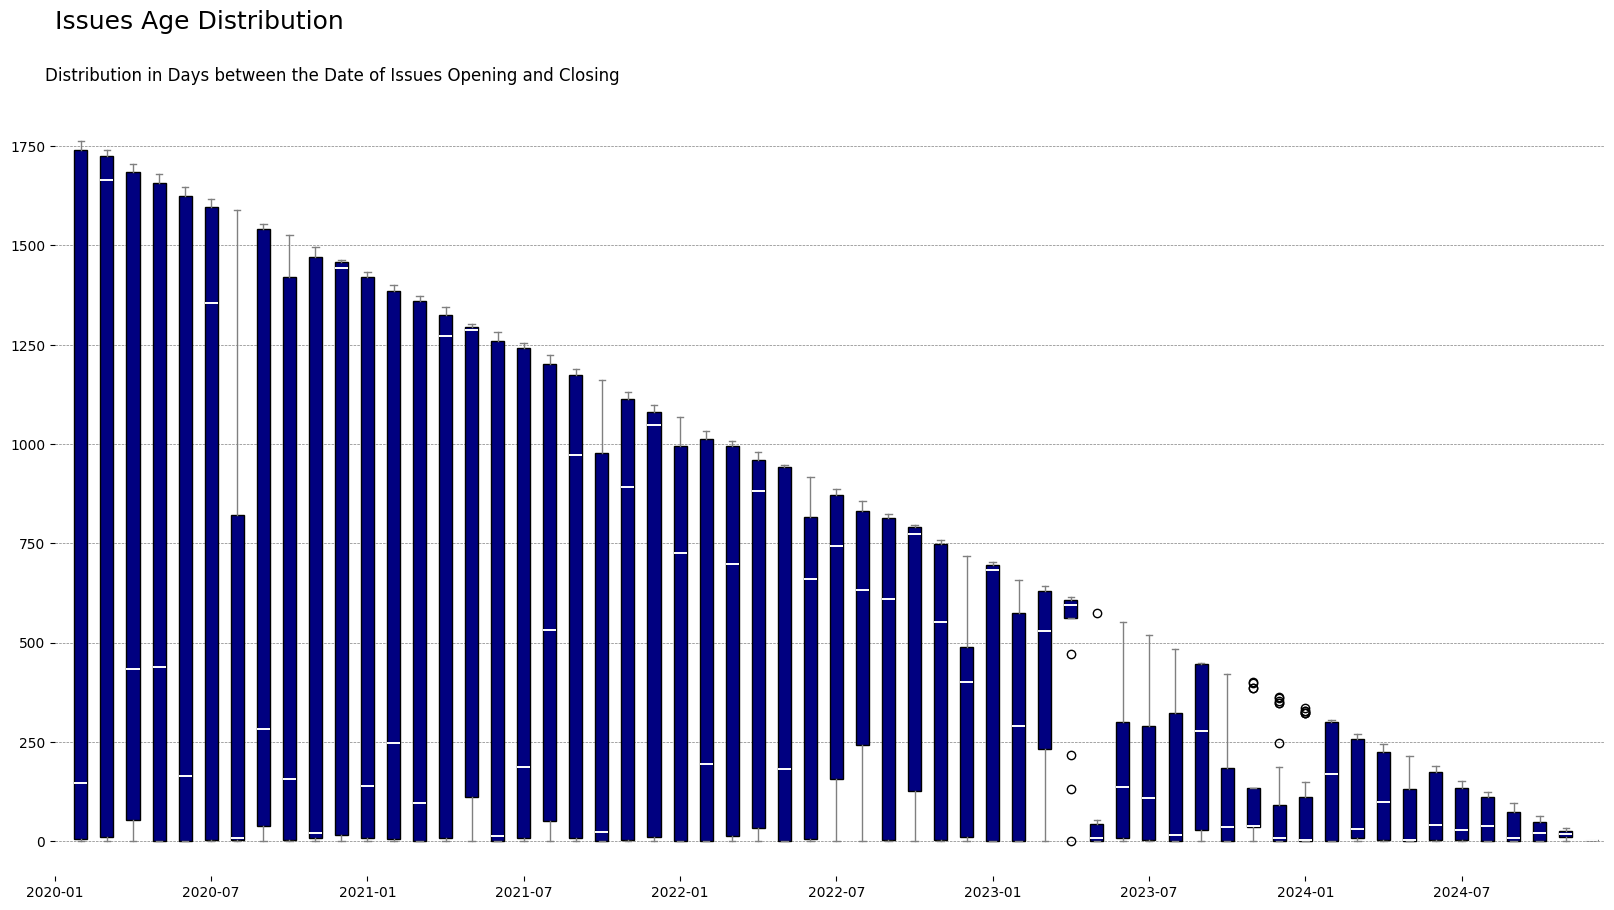

In [507]:
plt.figure(figsize=(20, 10))
box = plt.boxplot(data_to_plot, labels=average_age['created_at_mm_yyyy'].unique(), patch_artist=True)

tick_labels = average_age['created_at_mm_yyyy'].unique()
plt.xticks(ticks=range(0, len(tick_labels)), labels=tick_labels, rotation=0)
num_ticks = len(tick_labels)
plt.xticks(ticks=range(0, num_ticks, 6), labels=tick_labels[::6], rotation=0)

for patch in box['boxes']: patch.set_facecolor('navy') 
for whisker in box['whiskers']: whisker.set_color('gray')
for cap in box['caps']: cap.set_color('gray') 
for median in box['medians']: median.set_color('white'); median.set_linewidth(1.4)
for flier in box['fliers']: flier.set(marker='o', color='gray', alpha=1)

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Issues Age Distribution', loc='left', fontsize=18, x=0.0, y=1.09)
plt.suptitle('Distribution in Days between the Date of Issues Opening and Closing', fontsize=12, x=0.12, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Pull Requests Age (Difference in Days) by Date of Openning (Month)

In [508]:
warnings.filterwarnings("ignore") ## Warning generated on timezone.utc library

average_age = df_pull_requests[['id', 'created_at', 'closed_at']]
average_age = average_age[average_age['created_at'].str.startswith('202')]

average_age['created_at'] = pd.to_datetime(average_age['created_at'])
average_age['closed_at'] = pd.to_datetime(average_age['closed_at'])
average_age['closed_at'].fillna(pd.Timestamp.now(timezone.utc), inplace=True)
average_age['average_age'] = (average_age['closed_at'] - average_age['created_at']).dt.days
average_age['created_at_mm_yyyy'] = average_age['created_at'].dt.strftime('%Y-%m')
average_age['closed_at_mm_yyyy'] = average_age['closed_at'].dt.strftime('%Y-%m')
average_age['created_at_mm_yyyy'] = average_age['created_at_mm_yyyy'].astype('category')

average_age = average_age.sort_values(['created_at'], ascending=True)

In [509]:
data_to_plot = [average_age[average_age['created_at_mm_yyyy'] == mm]['average_age'] for mm in average_age['created_at_mm_yyyy'].unique()]

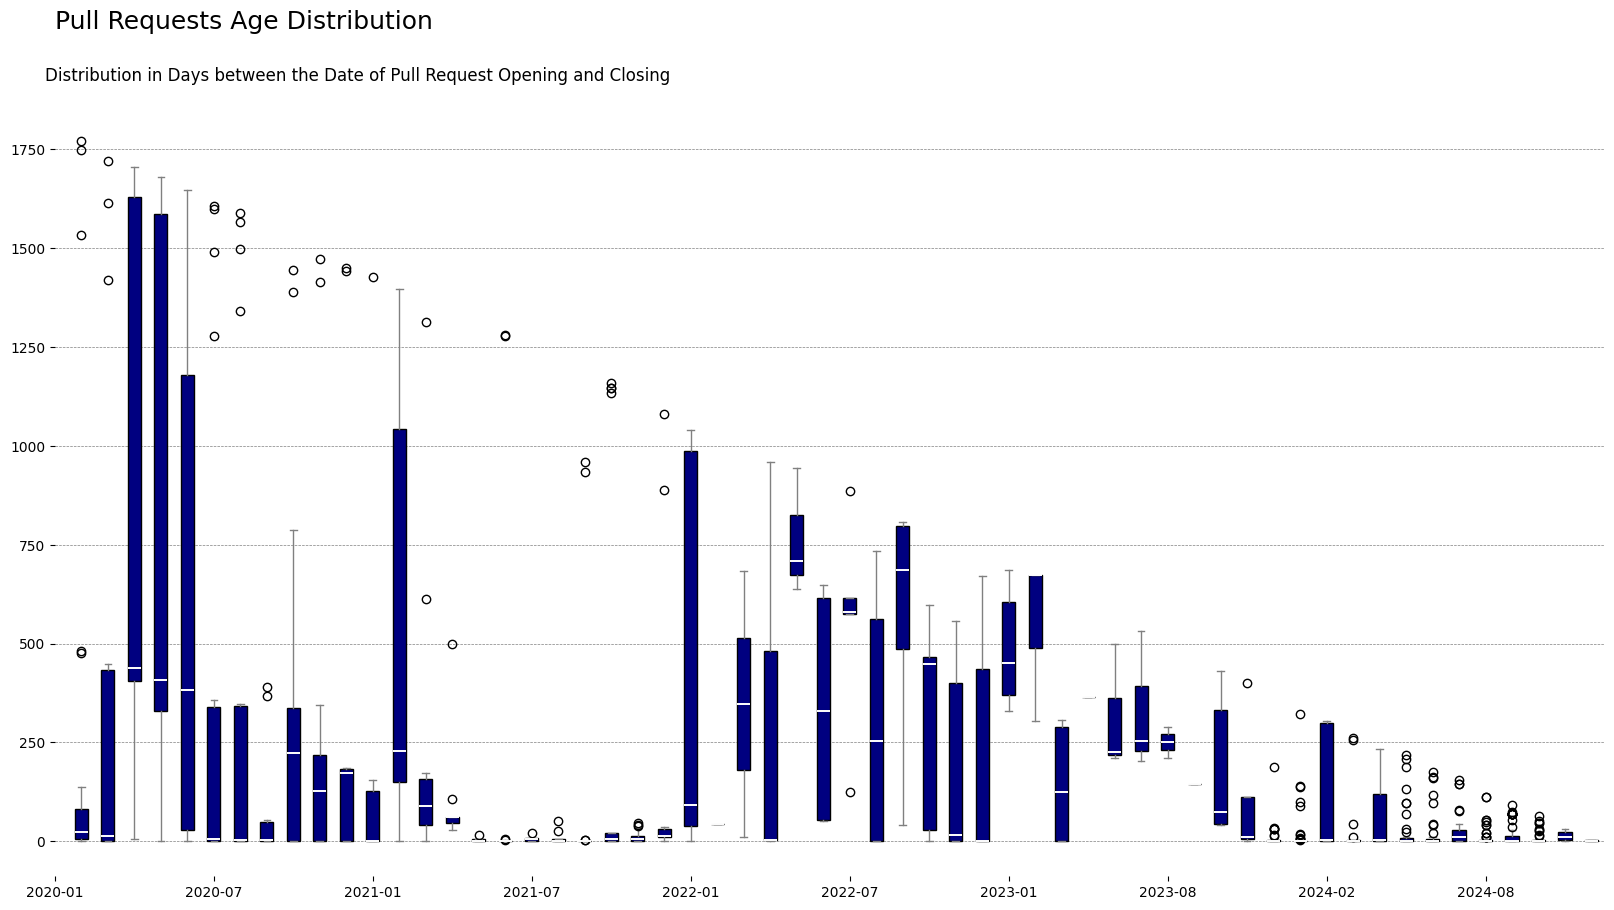

In [510]:
plt.figure(figsize=(20, 10))
box = plt.boxplot(data_to_plot, labels=average_age['created_at_mm_yyyy'].unique(), patch_artist=True)

tick_labels = average_age['created_at_mm_yyyy'].unique()
plt.xticks(ticks=range(0, len(tick_labels)), labels=tick_labels, rotation=0)
num_ticks = len(tick_labels)
plt.xticks(ticks=range(0, num_ticks, 6), labels=tick_labels[::6], rotation=0)

for patch in box['boxes']: patch.set_facecolor('navy') 
for whisker in box['whiskers']: whisker.set_color('gray')
for cap in box['caps']: cap.set_color('gray') 
for median in box['medians']: median.set_color('white'); median.set_linewidth(1.4)
for flier in box['fliers']: flier.set(marker='o', color='gray', alpha=1)

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Pull Requests Age Distribution', loc='left', fontsize=18, x=0.0, y=1.09)
plt.suptitle('Distribution in Days between the Date of Pull Request Opening and Closing', fontsize=12, x=0.12, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()

## Pull Requests Opened and Closed by Month

In [511]:
warnings.filterwarnings("ignore") ## Warning generated on timezone.utc library

average_age = df_pull_requests[['id', 'created_at', 'closed_at']]
average_age['created_at'] = pd.to_datetime(average_age['created_at'])
average_age['closed_at'] = pd.to_datetime(average_age['closed_at'])
average_age = average_age[average_age['closed_at'].notna()]
average_age['average_age'] = (average_age['closed_at'] - average_age['created_at']).dt.days
average_age['created_at_mm_yyyy'] = average_age['created_at'].dt.strftime('%Y-%m')
average_age['closed_at_mm_yyyy'] = average_age['closed_at'].dt.strftime('%Y-%m')

In [512]:
average_age_closed = average_age\
    .groupby('closed_at_mm_yyyy')['average_age']\
    .agg(['mean', 'max', 'min', 'count'])

average_age_closed['mean'] = average_age_closed['mean'].round(1)
average_age_closed = average_age_closed.reset_index()

In [513]:
average_age = average_age\
    .groupby('created_at_mm_yyyy')['average_age']\
    .agg(['mean', 'max', 'min', 'count'])

average_age['mean'] = average_age['mean'].round(1)
average_age = average_age.reset_index()

In [514]:
opened_df = average_age.rename(
        columns = {
            'created_at_mm_yyyy': 'month', 
            'count': 'count_opened'
        }
    )[['month', 'count_opened']]

closed_df = average_age_closed.rename(
        columns = {
            'closed_at_mm_yyyy': 'month', 
            'count': 'count_closed'
        }
    )[['month', 'count_closed']]

merged_df = pd.merge(
        opened_df,
        closed_df,
        on = 'month',
        how = 'outer'
    ).fillna(0) 

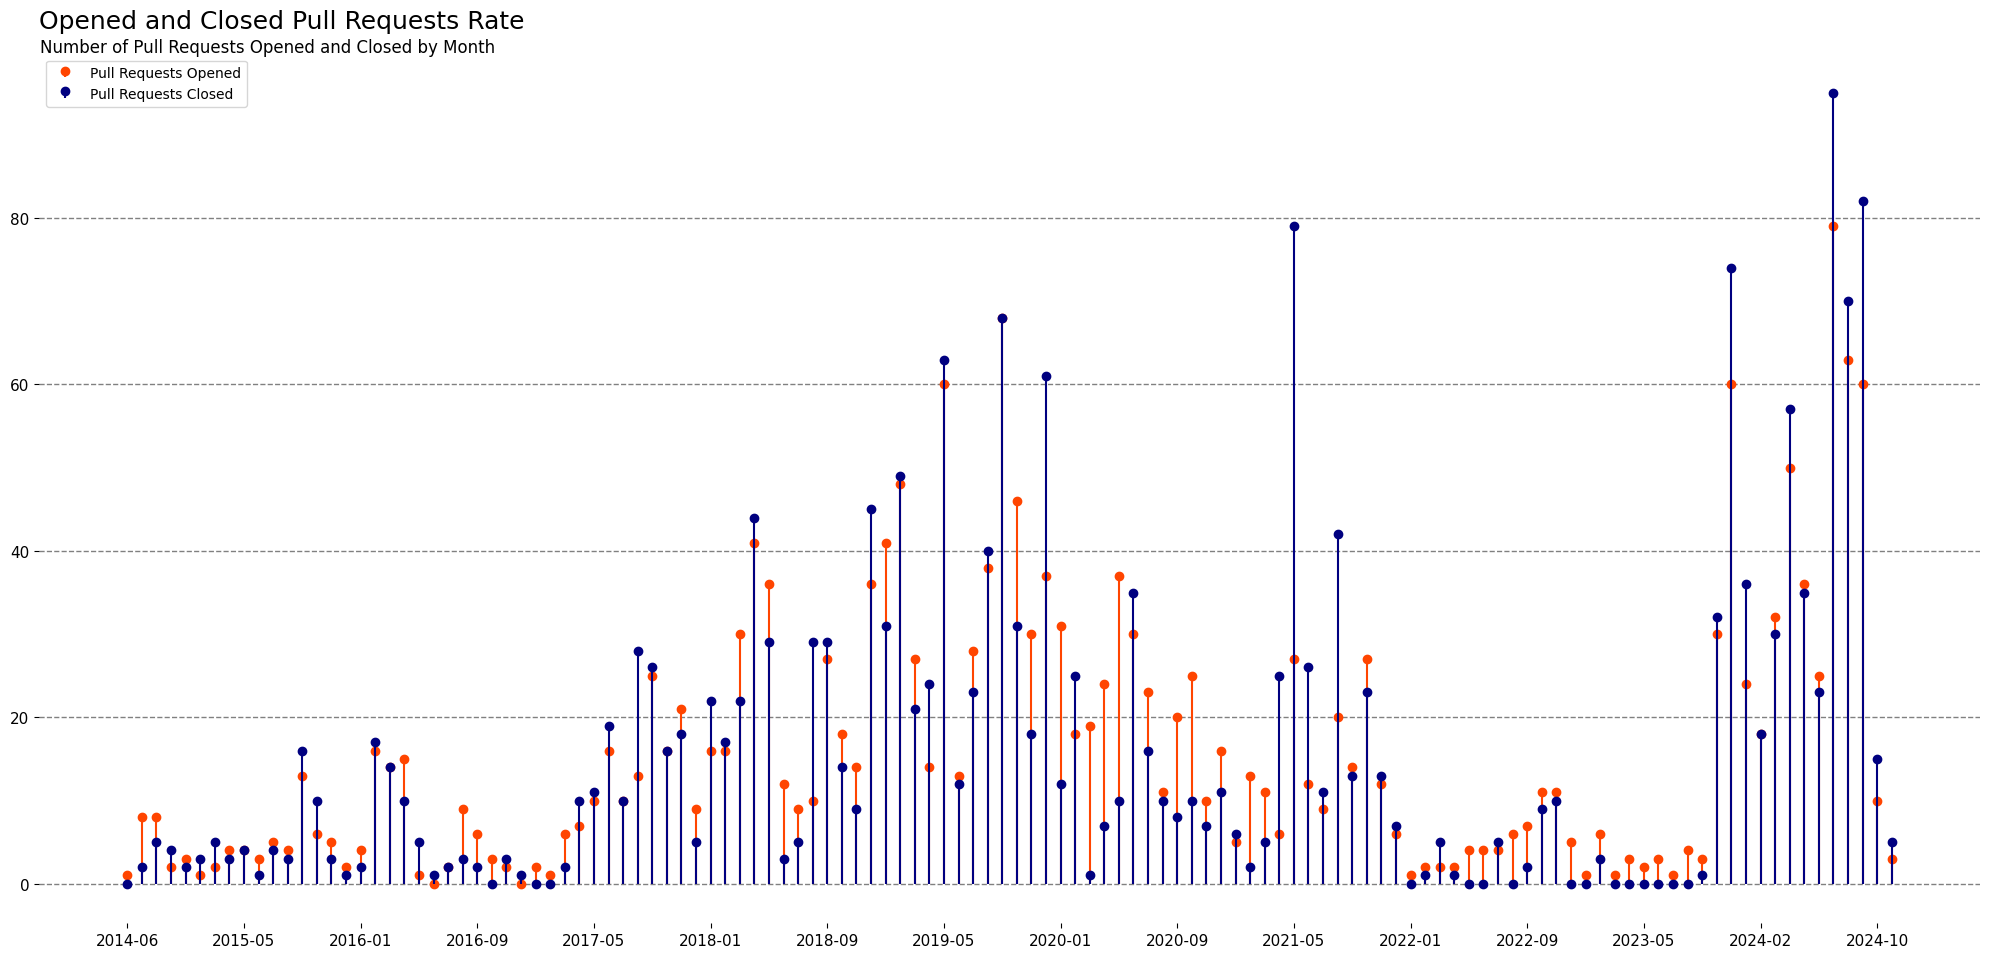

In [515]:
months = merged_df['month']
opened_counts = merged_df['count_opened']
closed_counts = merged_df['count_closed']

plt.figure(figsize=(20, 10))
plt.title('Opened and Closed Pull Requests Rate', loc='left', fontsize=18, x=0.0, y=1.02)
plt.suptitle('Number of Pull Requests Opened and Closed by Month', fontsize=12, x=0.022333, ha='left', y=0.925)

plt.stem(months, opened_counts, linefmt='orangered', markerfmt='orangered', basefmt=" ", label='Pull Requests Opened')
plt.stem(months, closed_counts, linefmt='navy', markerfmt='navy', basefmt=" ", label='Pull Requests Closed')

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::8], rotation=0, fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.legend()
plt.show()

In [516]:
months = merged_df['month']
opened_counts = merged_df['count_opened']
closed_counts = merged_df['count_closed']

fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=opened_counts,
    name='Pull Requests Opened',
    marker=dict(color='orangered')
))

fig.add_trace(go.Bar(
    x=months,
    y=closed_counts,
    name='Pull Requests Closed',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Opened and Closed Pull Requests Rate',
    xaxis_title='Months',
    yaxis_title='Number of Pull Requests',
    yaxis=dict(range=[0, max(max(opened_counts), max(closed_counts)) * 1.1]),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(orientation='h', yanchor='bottom', y=1.01, xanchor='center', x=0.5),
    annotations=[
        dict(
            text='Number of Pull Requests Opened and Closed by Month',
            xref='paper',
            yref='paper',
            x=-0.009,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(max(opened_counts), max(closed_counts)) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.update_xaxes(
    rangeslider_visible=True,
    range=[months.min(), months.max()]
)

fig.show()

In [517]:
merged_df['activity'] = merged_df['count_closed'] - merged_df['count_opened']

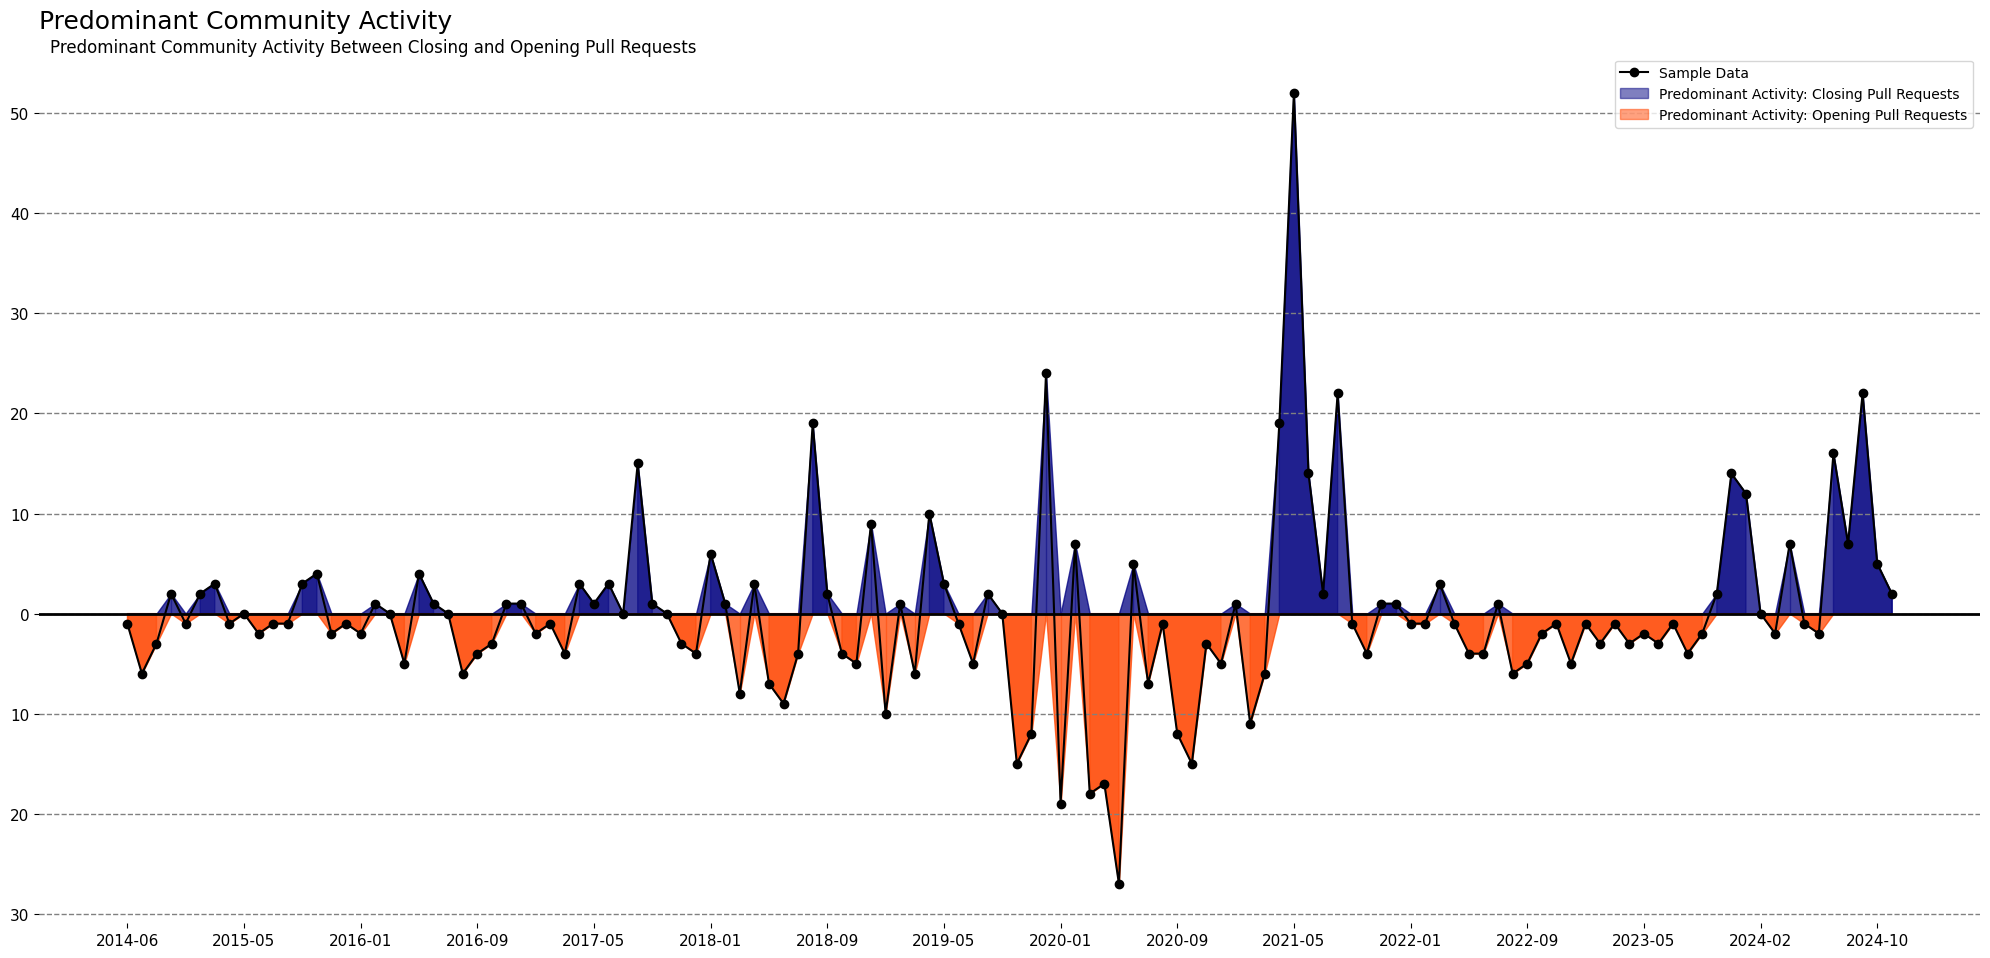

In [518]:
plt.figure(figsize=(20, 10))

plt.title('Predominant Community Activity', loc='left', fontsize=18, x=0.0, y=1.02)
plt.suptitle('Predominant Community Activity Between Closing and Opening Pull Requests', fontsize=12, x=0.027333, ha='left', y=0.925)

plt.plot(merged_df['month'], merged_df['activity'], marker='o', linestyle='-', label='Sample Data', color='black')
plt.axhline(y=0, color='black', linewidth=2, linestyle='-')

plt.fill_between(
    merged_df['month'], 
    merged_df['activity'], 
    where=(merged_df['activity'] > 0), 
    color='navy', 
    alpha=0.5, 
    label='Predominant Activity: Closing Pull Requests'
)

plt.fill_between(
    merged_df['month'], 
    merged_df['activity'], 
    where=(merged_df['activity'] <= 0), 
    color='orangered', 
    alpha=0.5, 
    label='Predominant Activity: Opening Pull Requests'
)

plt.xticks(merged_df['month'][::8], fontsize=11)
plt.yticks(fontsize=11)

plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend()

positive_activity = merged_df['activity'].clip(lower=0)
negative_activity = merged_df['activity'].clip(upper=0)

plt.fill_between(merged_df['month'], positive_activity, color='navy', alpha=0.75, label='Above 0')
plt.fill_between(merged_df['month'], negative_activity, color='orangered', alpha=0.75, label='Below 0')

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: abs(int(x))))

plt.tight_layout()
plt.show()


In [519]:
months = merged_df['month']
activity = merged_df['activity']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months,
    y=activity.where(activity >= 0, 0), 
    mode='lines',
    line=dict(color='rgba(0, 0, 0, 0)', width=2),  
    fill='tozeroy',
    fillcolor='rgba(0, 0, 128, 0.8)', 
    name='Predominant Activity: Closing Pull Requests'
))

fig.add_trace(go.Scatter(
    x=months,
    y=activity.where(activity <= 0, 0), 
    mode='lines',
    line=dict(color='rgba(0, 0, 0, 0)', width=2),  
    fill='tozeroy',
    fillcolor='rgba(255, 69, 0, 0.8)',
    name='Predominant Activity: Opening Pull Requests'
))

fig.add_trace(go.Scatter(
    x=months,
    y=activity,
    mode='lines+markers',
    name='Sample Data',
    line=dict(color='black'),  
    marker=dict(color='black')
))

fig.update_layout(
    title='Predominant Community Activity',
    xaxis_title='Months',
    yaxis_title='Activity',
    xaxis=dict(tickmode='array', tickvals=months[::8], ticktext=months[::8]),
    yaxis=dict(range=[min(activity) * 1.1, max(activity) * 1.1]),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.0,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Predominant Activity: Opening Pull Requests',
            xref='paper',
            yref='paper',
            x=-0.009,
            y=1.09,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[min(activity) * 1.1, max(activity) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.update_xaxes(
    rangeslider_visible=True,
    range=[months.min(), months.max()]
)

fig.show()


## Pull Requests (Open and Closed) By Label

In [520]:
pr_distribution = df_pull_requests[['id', 'labels', 'state']]

In [521]:
def extract_values(text):
    return re.findall(r'(".*?")', text)

pr_distribution['labels'] = pr_distribution['labels']\
    .apply(extract_values)\
    .apply(lambda x: list(x) if isinstance(x, (list, tuple)) else [])\
    .explode('labels')\
    .apply(lambda x: None if pd.isna(x) else x)

In [522]:
pr_distribution = pr_distribution[['labels', 'state', 'id']]\
    .groupby(['labels', 'state'])\
    .count()\
    .reset_index()\
    .sort_values(by = 'id', ascending=False)

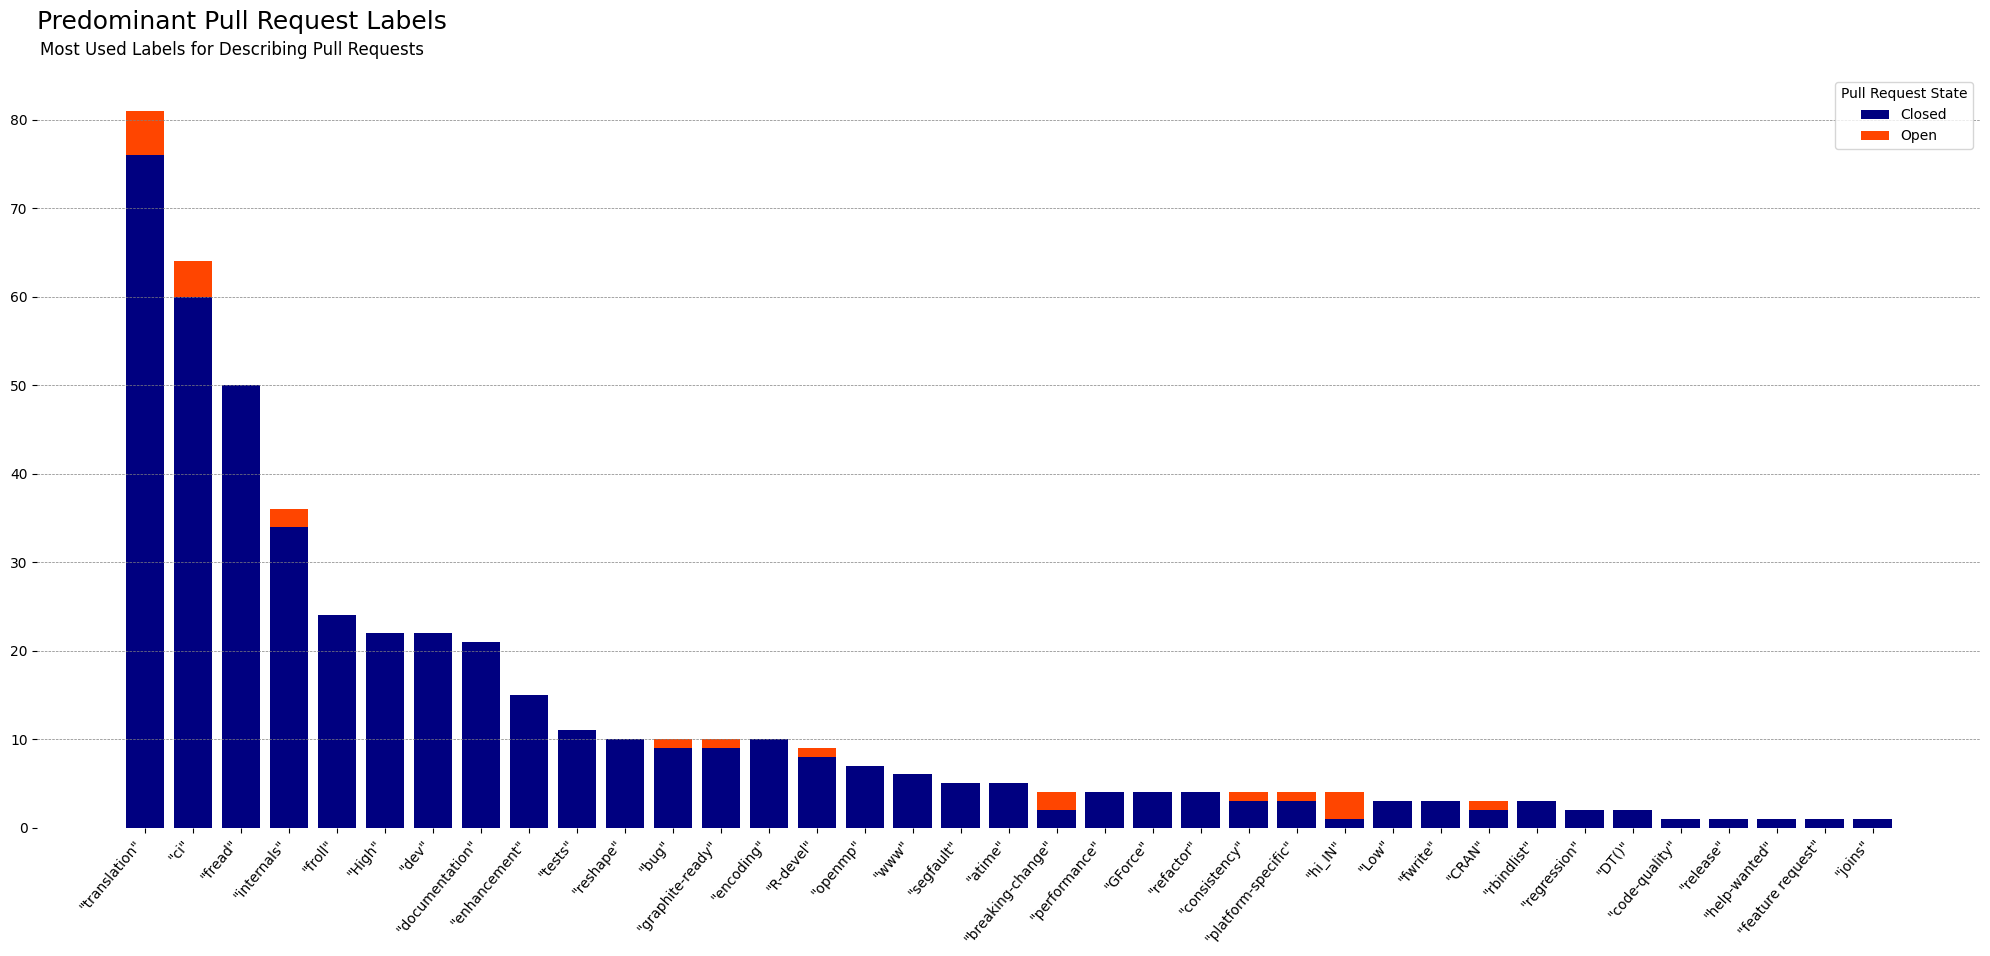

In [523]:
plt.figure(figsize=(20, 10))

plt.title('Predominant Pull Request Labels', loc='left', fontsize=18, x=0.0, y=1.05)
plt.suptitle('Most Used Labels for Describing Pull Requests ', fontsize=12, x=0.0225, ha='left', y=0.92)

colors = {
    'closed': 'navy', 
    'open': 'orangered'
}

unique_labels = pr_distribution['labels'].unique()
bar_positions = np.arange(len(unique_labels))
closed_counts = np.zeros(len(unique_labels))
open_counts = np.zeros(len(unique_labels))

for state in pr_distribution['state'].unique():
    subset = pr_distribution[pr_distribution['state'] == state]
    for index, row in subset.iterrows():
        label_index = np.where(unique_labels == row['labels'])[0][0]
        if state == 'closed':
            closed_counts[label_index] = row['id']
        elif state == 'open':
            open_counts[label_index] = row['id']

total_counts = closed_counts + open_counts
sorted_indices = np.argsort(total_counts)[::-1]
sorted_labels = unique_labels[sorted_indices]
sorted_closed_counts = closed_counts[sorted_indices]
sorted_open_counts = open_counts[sorted_indices]
sorted_bar_positions = np.arange(len(sorted_labels))

plt.bar(
    sorted_bar_positions, 
    sorted_closed_counts, 
    color=colors['closed'], 
    label='Closed', 
    alpha=1
)

plt.bar(
    sorted_bar_positions, 
    sorted_open_counts, 
    bottom=sorted_closed_counts, 
    color=colors['open'], 
    label='Open', 
    alpha=1
)

plt.xticks(sorted_bar_positions, sorted_labels, rotation=50, ha='right')
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(title='Pull Request State')

plt.tight_layout()
plt.show()


## Number of Contributors in the Community [Opening Pull Requesting]

In [524]:
pull_request_contributors = df_pull_requests[['id', 'created_by', 'created_at']]

In [525]:
pull_request_contributors['created_by'] = pull_request_contributors['created_by']\
    .str\
    .replace(
        'https://api.github.com/users/', 
        '', 
        regex = False
    )
pull_request_contributors['created_at'] = pd.to_datetime(pull_request_contributors['created_at'], errors='coerce').dt.strftime('%Y-%m')

In [526]:
pull_request_contributors = pull_request_contributors.groupby(['created_by', 'created_at']).count().reset_index()

In [527]:
pull_request_contributors = pull_request_contributors\
    .groupby('created_at')\
    .count()\
    .reset_index()\
    [['created_at', 'created_by']]\
    .rename(
        columns = {'created_by': 'number_of_users'}
    )

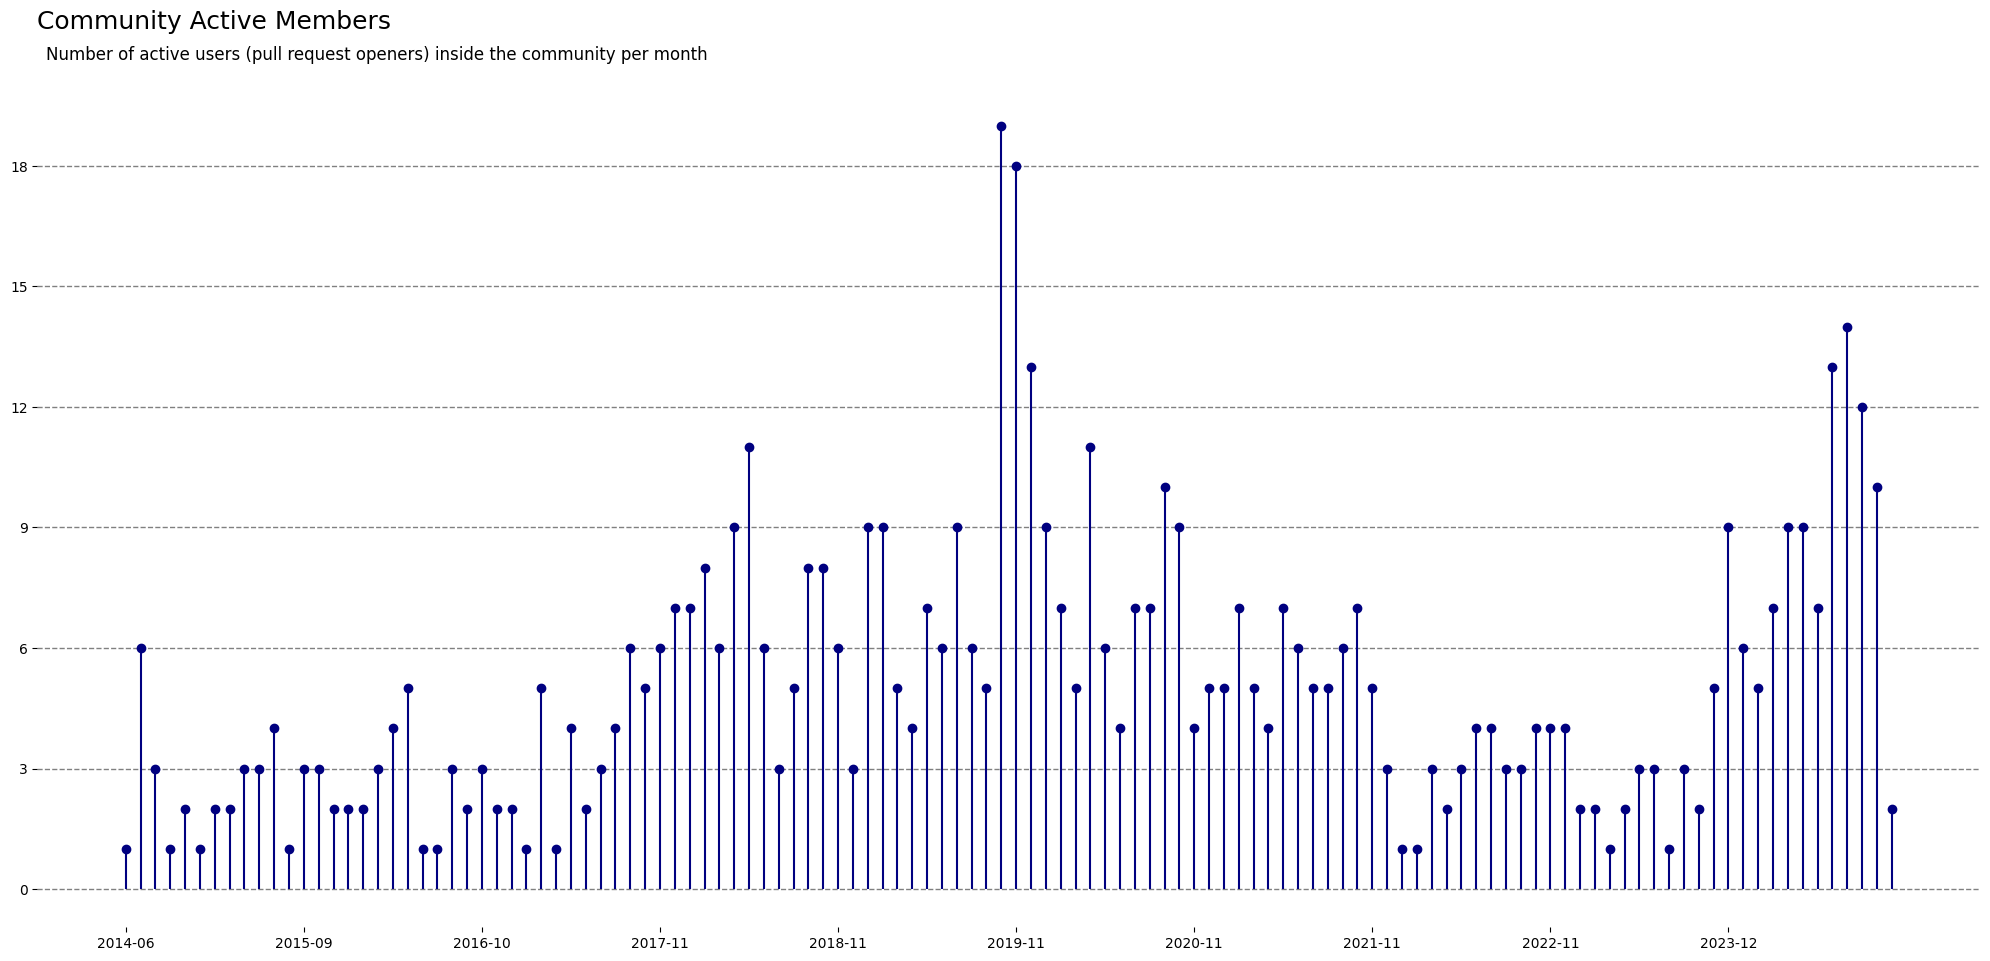

In [528]:
months = pull_request_contributors['created_at']
mean_values = pull_request_contributors['number_of_users']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community Active Members', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Number of active users (pull request openers) inside the community per month', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks(range(0, 21, 3))
plt.tight_layout()
plt.show()

In [529]:
months = pull_request_contributors['created_at']
mean_values = pull_request_contributors['number_of_users']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Active Pull Request Openers',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community Active Members',
    xaxis_title='Months',
    yaxis_title='Number of Active Users',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-1, max(mean_values) * 1.1], dtick=3),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Number of active users (pull request openers) inside the community per month',
            xref='paper',
            yref='paper',
            x=-0.009,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()

## Number of Contributors in the Community [All Activities]

In [530]:
pull_request_contributors_v2 = df_pull_requests[['id', 'created_by', 'created_at']]
pull_requests_comments_contributors = df_pull_requests_comments[['id', 'created_by', 'created_at']]
issues_contributors = df_issues[['id', 'created_by', 'created_at']]
issues_comments_contributors = df_issues_comments[['id', 'created_by', 'created_at']]

In [531]:
pull_request_contributors_v2['created_by'] = pull_request_contributors_v2['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
issues_contributors['created_by'] = issues_contributors['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
pull_requests_comments_contributors['created_by'] = pull_requests_comments_contributors['created_by'].str.extract(r'login="([^"]+)"')

In [532]:
community_activity = result = pd.concat(
    [pull_request_contributors_v2, pull_requests_comments_contributors, issues_contributors, issues_comments_contributors], 
    ignore_index=True
)

In [533]:
community_activity['created_by'] = community_activity['created_by']\
    .str\
    .replace(
        'https://api.github.com/users/', 
        '', 
        regex = False
    )
community_activity['created_at'] = pd.to_datetime(community_activity['created_at'], errors='coerce').dt.strftime('%Y-%m')

In [534]:
community_activity = community_activity.groupby(['created_by', 'created_at']).count().reset_index()

In [535]:
community_activity = community_activity\
    .groupby('created_at')\
    .count()\
    .reset_index()\
    [['created_at', 'created_by']]\
    .rename(
        columns = {'created_by': 'number_of_users'}
    )

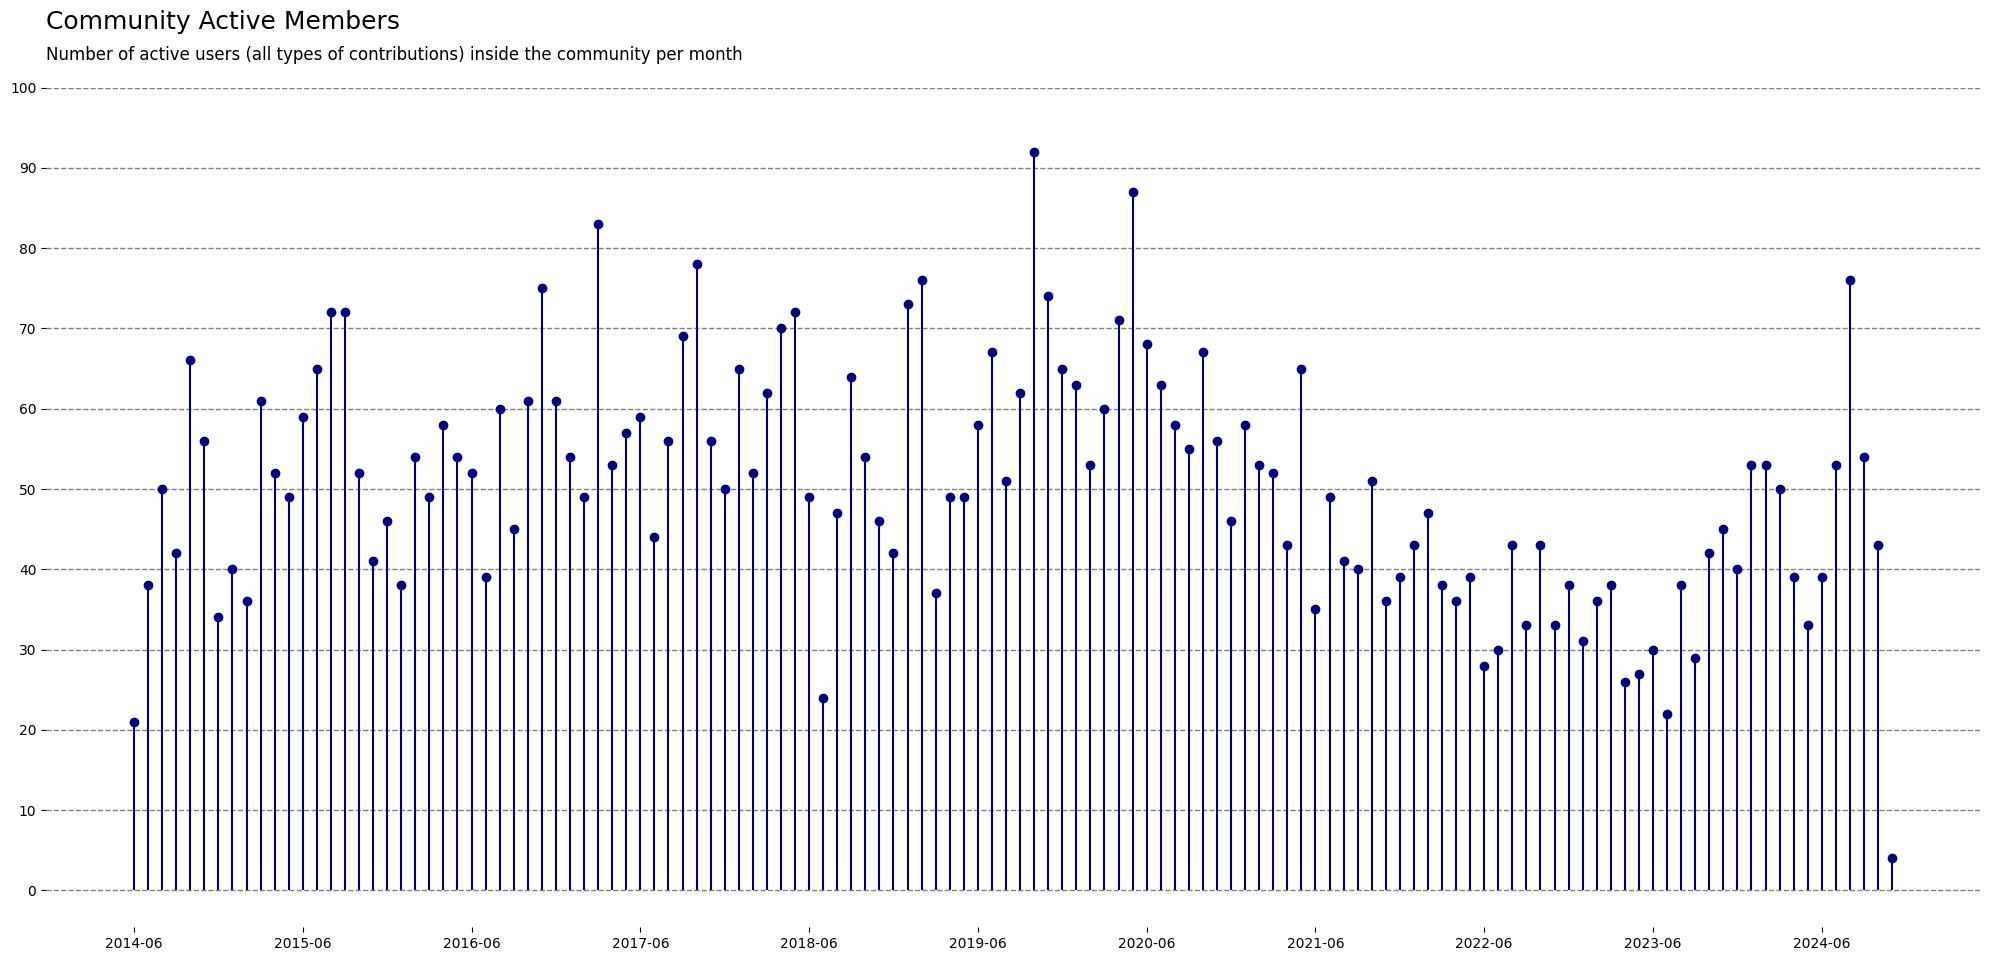

In [536]:
months = community_activity['created_at']
mean_values = community_activity['number_of_users']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community Active Members', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Number of active users (all types of contributions) inside the community per month', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks(range(0, 105, 10))
plt.tight_layout()
plt.show()

In [537]:
months = community_activity['created_at']
mean_values = community_activity['number_of_users']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Active Members',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community Active Members',
    xaxis_title='Months',
    yaxis_title='Number of Active Users',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-2, max(mean_values) * 1.1], dtick=10),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Number of active users (all types of contributions) inside the community per month',
            xref='paper',
            yref='paper',
            x=-0.009,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()


## Comparison of Contributors focused on Openning PR inside the Community

In [538]:
comparison_community_activity_pr_not_pr = pd.merge(
    community_activity, 
    pull_request_contributors, 
    on = ['created_at'], 
    how = "outer"
)

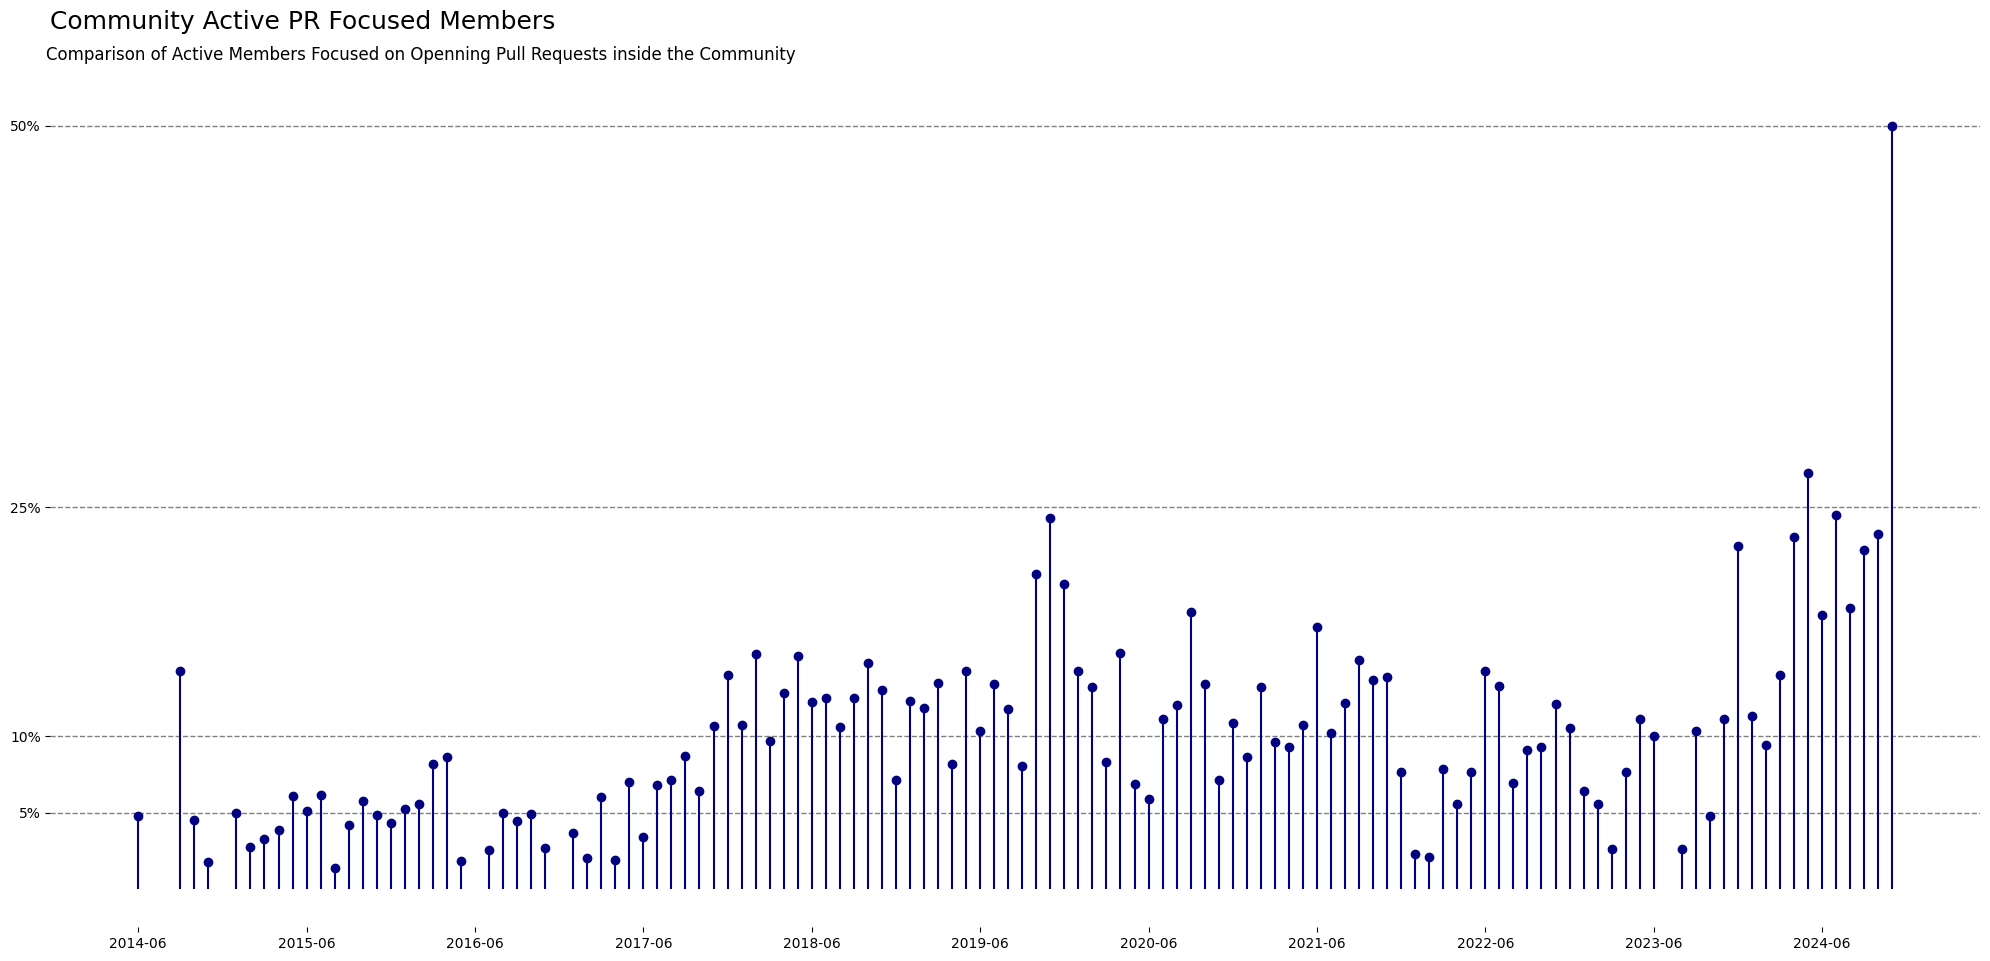

In [539]:
months = comparison_community_activity_pr_not_pr['created_at']
mean_values = comparison_community_activity_pr_not_pr['number_of_users_y'] / comparison_community_activity_pr_not_pr['number_of_users_x']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community Active PR Focused Members', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Comparison of Active Members Focused on Openning Pull Requests inside the Community', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks([0.05, 0.1, 0.25, 0.5], ['5%', '10%', '25%', '50%'])
plt.tight_layout()
plt.show()

In [540]:
months = comparison_community_activity_pr_not_pr['created_at']
mean_values = comparison_community_activity_pr_not_pr['number_of_users_y'] / comparison_community_activity_pr_not_pr['number_of_users_x']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Active PR Focused Members',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community Active PR Focused Members',
    xaxis_title='Months',
    yaxis_title='Active Members Ratio',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-0.01, max(mean_values) * 1.1], dtick=0.05),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Comparison of Active Members Focused on Opening Pull Requests inside the Community',
            xref='paper',
            yref='paper',
            x=-0.009,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()


## Number of New Contributors Month by Month in the Community [Opening Pull Requesting]

In [541]:
pull_request_contributors = df_pull_requests[['id', 'created_by', 'created_at']]

In [542]:
pull_request_contributors['created_by'] = pull_request_contributors['created_by']\
    .str\
    .replace(
        'https://api.github.com/users/', 
        '', 
        regex = False
    )
pull_request_contributors['created_at'] = pd.to_datetime(pull_request_contributors['created_at'], errors='coerce').dt.strftime('%Y-%m')

In [543]:
pull_request_contributors = pull_request_contributors.sort_values(['created_at'], ascending=True)

In [544]:
grouped_data = pull_request_contributors\
    .groupby('created_by')\
    .agg(all_values = ('created_at', list))\
    .reset_index()

In [545]:
pull_request_contributors = pull_request_contributors\
    .groupby(['created_by'])\
    .first()\
    .reset_index()

In [546]:
pull_request_contributors = pull_request_contributors\
    .groupby('created_at')\
    .count()\
    .reset_index()\
    [['created_at', 'created_by']]\
    .rename(
        columns = {'created_by': 'number_of_users'}
    )

In [547]:
pull_request_contributors['created_at'] = pd.to_datetime(pull_request_contributors['created_at'])
pull_request_contributors['created_at'] = pull_request_contributors['created_at'].dt.to_period('M')

In [548]:
min_month = pull_request_contributors['created_at'].min()
max_month = pull_request_contributors['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M')})

In [549]:
full_data = pd.merge(all_months, pull_request_contributors, on='created_at', how='left')
full_data['number_of_users'] = full_data['number_of_users'].fillna(0)

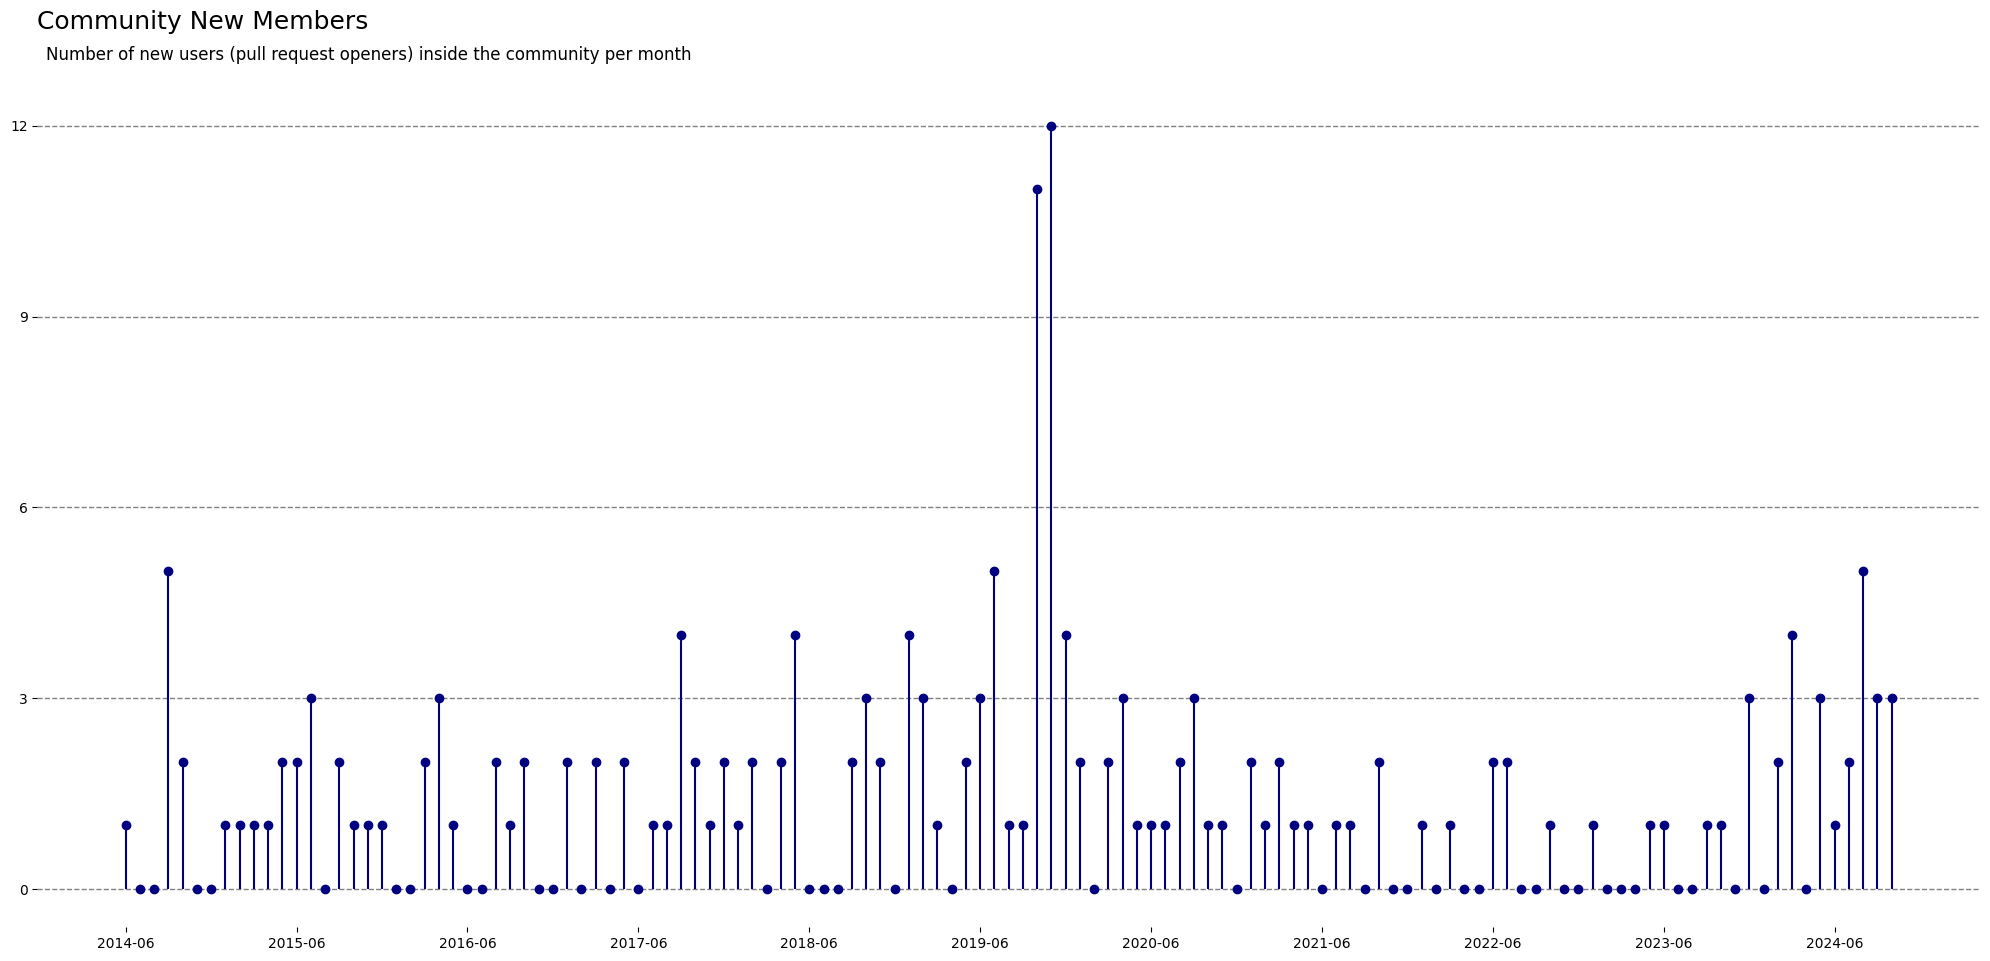

In [550]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_users']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community New Members', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Number of new users (pull request openers) inside the community per month', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks(range(0, 15, 3))
plt.tight_layout()
plt.show()

In [551]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_users']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Number of New Users',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community New Members (Pull Request Openers)',
    xaxis_title='Months',
    yaxis_title='Number of New Users',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-1, max(mean_values) * 1.1], dtick=3), 
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Number of new users (pull request openers) inside the community per month',
            xref='paper',
            yref='paper',
            x=-0.01,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()


## Number of New Contributors Month by Month in the Community [All Activities]

In [552]:
pull_request_contributors_v2 = df_pull_requests[['created_by', 'created_at']]
pull_requests_comments_contributors = df_pull_requests_comments[['created_by', 'created_at']]
issues_contributors = df_issues[['created_by', 'created_at']]
issues_comments_contributors = df_issues_comments[['created_by', 'created_at']]

In [553]:
pull_request_contributors_v2['created_by'] = pull_request_contributors_v2['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
issues_contributors['created_by'] = issues_contributors['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
pull_requests_comments_contributors['created_by'] = pull_requests_comments_contributors['created_by'].str.extract(r'login="([^"]+)"')

In [554]:
community_activity = result = pd.concat(
    [pull_request_contributors_v2, pull_requests_comments_contributors, issues_contributors, issues_comments_contributors], 
    ignore_index=True
)

In [555]:
community_activity = community_activity.sort_values(['created_at'], ascending=True)
community_activity['created_at'] = pd.to_datetime(community_activity['created_at'], errors='coerce').dt.strftime('%Y-%m')

In [556]:
community_activity = community_activity.drop_duplicates()

In [557]:
grouped_data = community_activity\
    .groupby('created_by')\
    .agg(all_values = ('created_at', list))\
    .reset_index()

In [558]:
community_activity = community_activity\
    .groupby(['created_by'])\
    .first()\
    .reset_index()

In [559]:
community_activity = community_activity\
    .groupby('created_at')\
    .count()\
    .reset_index()\
    [['created_at', 'created_by']]\
    .rename(
        columns = {'created_by': 'number_of_users'}
    )

In [560]:
min_month = community_activity['created_at'].min()
max_month = community_activity['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M')})

In [561]:
community_activity['created_at'] = pd.to_datetime(community_activity['created_at']).dt.to_period('M')

In [562]:
full_data = pd.merge(all_months, community_activity, on='created_at', how='left')
full_data['number_of_users'] = full_data['number_of_users'].fillna(0)

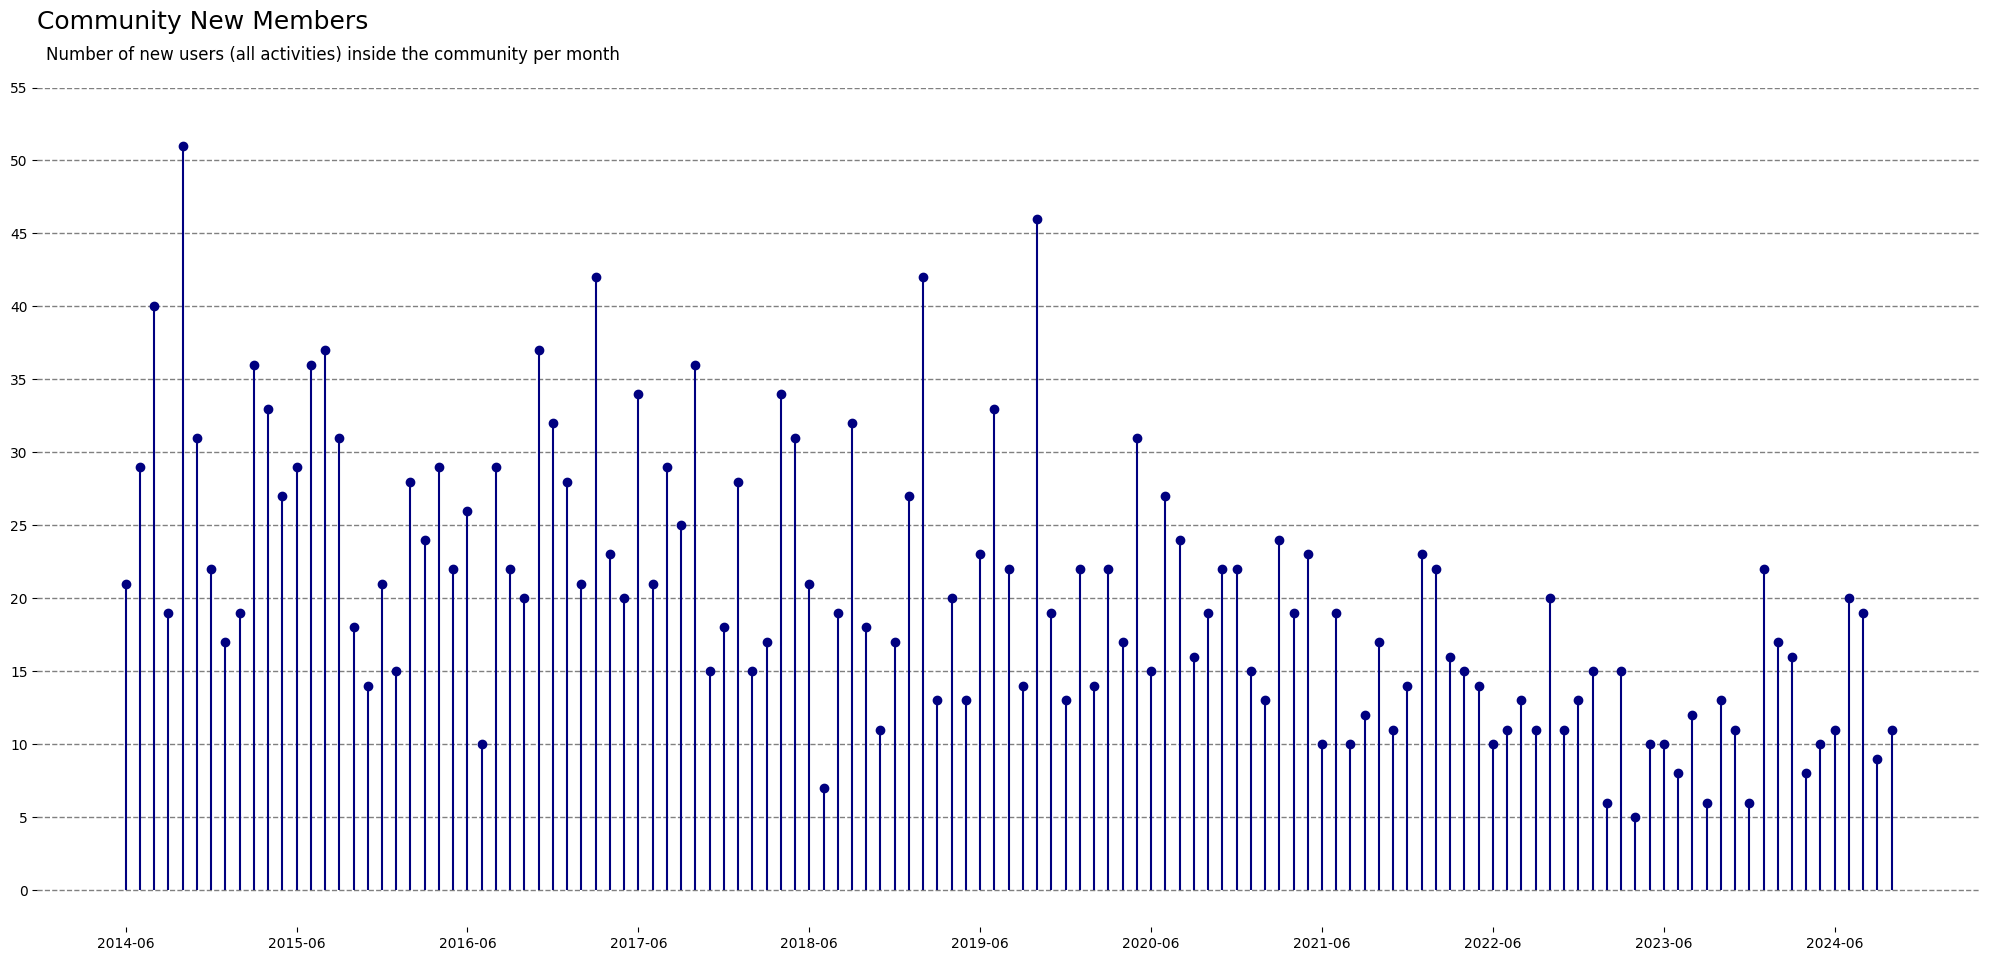

In [563]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_users']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community New Members', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Number of new users (all activities) inside the community per month', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks(range(0, 56, 5))
plt.tight_layout()
plt.show()

In [564]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_users']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Number of New Users',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community New Members',
    xaxis_title='Months',
    yaxis_title='Number of New Users',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[0, 55], dtick=5), 
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Number of new users (all activities) inside the community per month',
            xref='paper',
            yref='paper',
            x=-0.01,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()


## Number of Reviewers in Pull Requests By Month

In [565]:
pr_reviewers_by_month = df_pull_requests_comments[['created_by', 'created_at']]

In [566]:
pr_reviewers_by_month['created_by'] = pr_reviewers_by_month['created_by'].str.extract(r'login="([^"]+)"')
pr_reviewers_by_month['created_at'] = pd.to_datetime(pr_reviewers_by_month['created_at'], errors='coerce').dt.strftime('%Y-%m')
pr_reviewers_by_month = pr_reviewers_by_month.drop_duplicates()

In [567]:
pr_reviewers_by_month = pr_reviewers_by_month.groupby(['created_at']).count().reset_index()
pr_reviewers_by_month = pr_reviewers_by_month.rename(columns={'created_by': 'number_of_reviewers'})

In [568]:
min_month = community_activity['created_at'].min()
max_month = community_activity['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M')})

In [569]:
pr_reviewers_by_month['created_at'] = pd.to_datetime(pr_reviewers_by_month['created_at']).dt.to_period('M')

In [570]:
full_data = pd.merge(all_months, pr_reviewers_by_month, on='created_at', how='left')
full_data['number_of_reviewers'] = full_data['number_of_reviewers'].fillna(0)

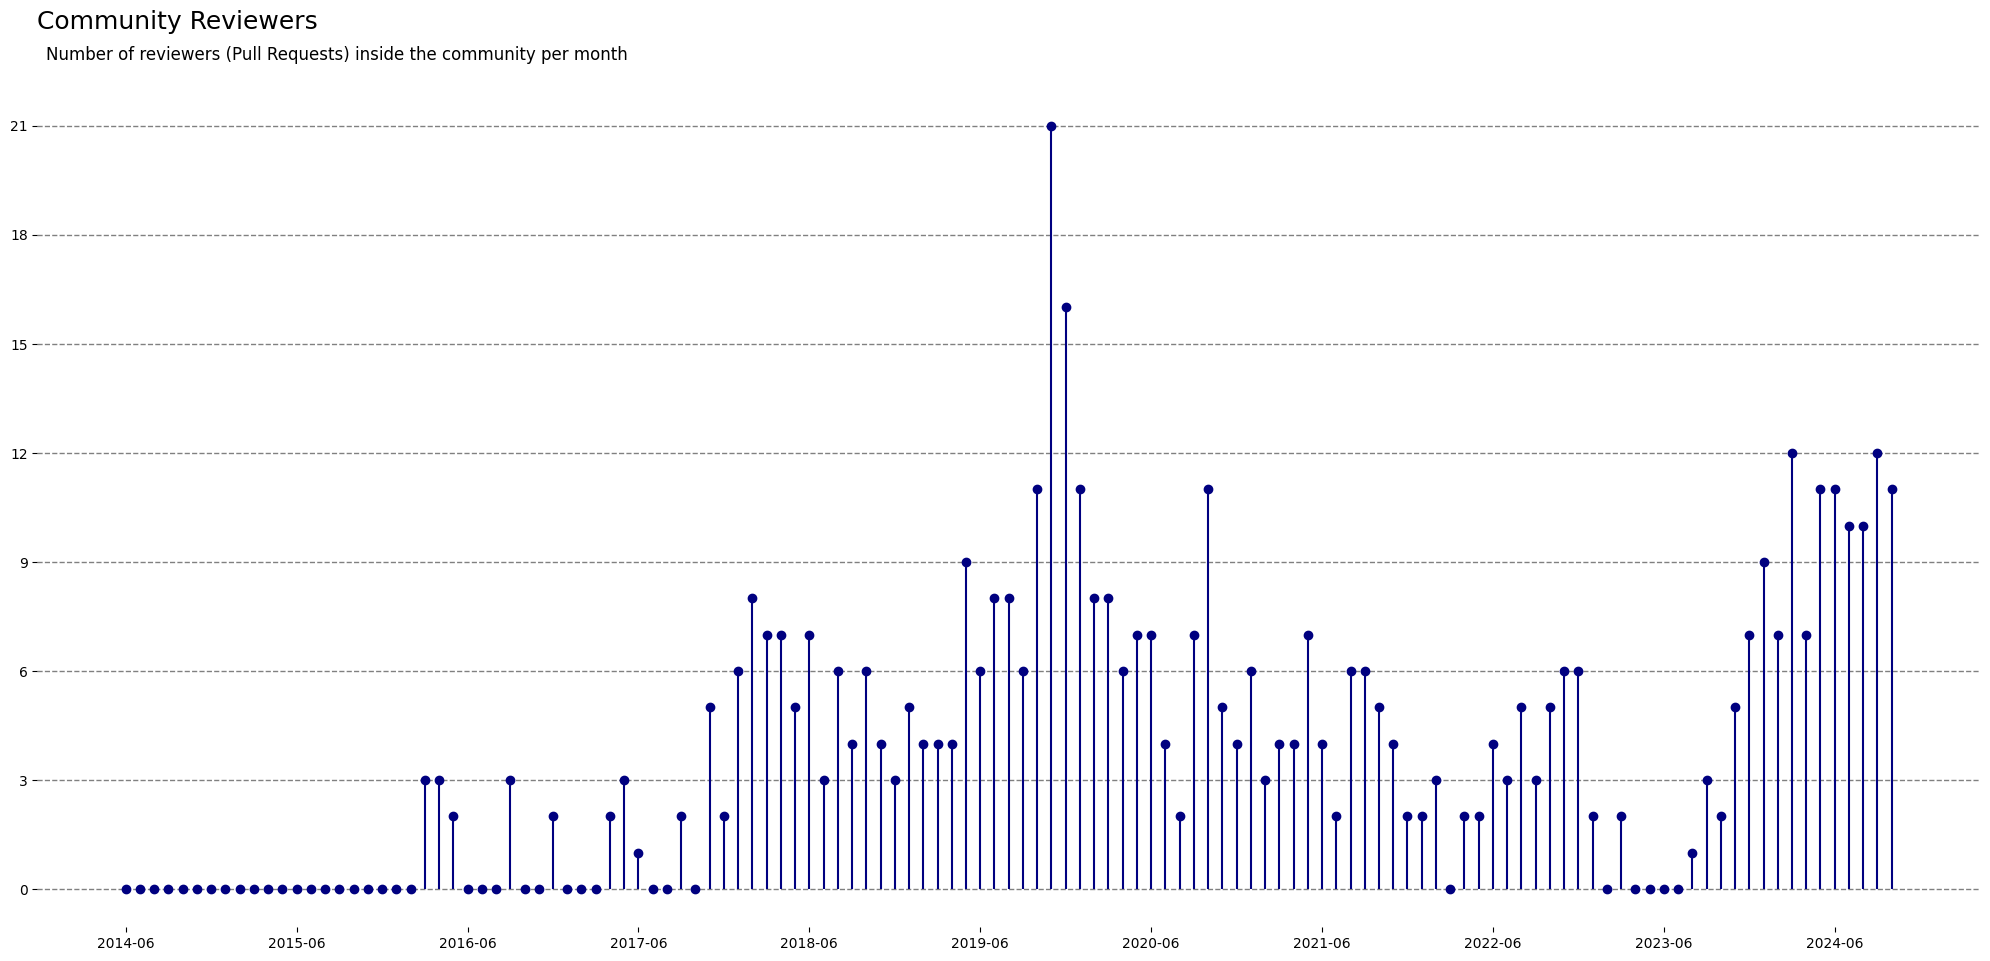

In [571]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_reviewers']

plt.figure(figsize=(20, 10))
plt.stem(months, mean_values, linefmt='navy', markerfmt='navy', basefmt=" ")

ax = plt.gca()  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.title('Community Reviewers', loc='left', fontsize=18, x=0.0, y=1.06)
plt.suptitle('Number of reviewers (Pull Requests) inside the community per month', fontsize=12, x=0.025333, ha='left', y=0.92)
plt.grid(True, axis='y', color='gray', linestyle='--', linewidth=1)
plt.xticks(months[::12], rotation=0) 
plt.yticks(range(0, 22, 3))
plt.tight_layout()
plt.show()

In [572]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_reviewers']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months,
    y=mean_values,
    mode='lines+markers',
    name='Number of Reviewers',
    line=dict(color='navy')
))

fig.update_layout(
    title='Number of reviewers (Pull Requests) inside the community per month',
    xaxis_title='Months',
    yaxis_title='Number of Reviewers',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m', 
    ),
    yaxis=dict(range=[-2, max(mean_values) * 1.1]),
    hovermode='x unified',
    width=1400, 
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))


fig.show()


## Social Networks

- The interaction between two users is defined when a user B interacts in a Issue or Pull Request after user's A interaction.
- The relationship between two users is defined when you have a mutual interaction between users A and B.

In [573]:
df_issues_comments['created_by'] = df_issues_comments['created_by'].str.extract(r'login="([^"]+)"')

In [574]:
df_issues_interaction = pd.concat(
        [
            df_issues_comments[['issue_id', 'created_by', 'created_at']],
            df_issues[['id', 'created_by', 'created_at']].rename(columns = {'id': 'issue_id'})
        ],
        ignore_index=True
    )

In [575]:
df_issues_interaction['created_by'] = df_issues_interaction['created_by']\
    .str\
    .replace(
        'https://api.github.com/users/', 
        '', 
        regex = False
    )

In [576]:
df_pr_interaction = pd.concat(
    [
        df_pull_requests_comments[['pull_request_id', 'created_by', 'created_at']],
        df_pull_requests[['id', 'created_by', 'created_at']].rename(columns = {'id': 'pull_request_id'})
    ],
    ignore_index=True
)

In [577]:
df_pr_interaction['created_by'] = df_pr_interaction['created_by'].str.extract(r'login="([^"]+)"')

In [578]:
df_issues_interaction['object'] = 'Issue'
df_pr_interaction['object'] = 'PullRequest'

In [579]:
df_interaction = pd.concat([
        df_pr_interaction.rename(columns = {'pull_request_id': 'id'}),
        df_issues_interaction.rename(columns = {'issue_id': 'id'})
    ],
    ignore_index=True
)

In [580]:
df_interaction['created_by'] = df_interaction['created_by'].str.lower()
df_interaction['created_at'] = pd.to_datetime(df_interaction['created_at']).dt.strftime('%Y-%m')

In [581]:
df_interaction['created_at'] = pd.to_datetime(df_interaction['created_at'])
df_interaction = df_interaction.sort_values(by = ['object', 'created_at']).reset_index(drop=True)
interactions = []
interaction_points = defaultdict(int)

In [582]:
for obj in df_interaction['object'].unique():
    obj_df = df_interaction[df_interaction['object'] == obj]

    for page in obj_df['id'].unique():
        page_df = obj_df[obj_df['id'] == page]
        
        previous_users = set()

        for _, row in page_df.iterrows():
            current_user = row['created_by']
            created_at = row['created_at']
            
            for user in previous_users:
                interaction_points[(current_user, user, created_at)] += 1
            
            previous_users.add(current_user)

In [583]:
interactions_df = pd.DataFrame(
    [(dev_a, dev_b, created_at, points) for (dev_a, dev_b, created_at), points in interaction_points.items()],
    columns=['Developer_A', 'Interacted_With', 'Created_At', 'Points']
)

In [584]:
interactions_df

Developer_A Interacted_With Created_At  Points
0      arunsrinivasan       mattdowle 2014-06-01       6
1            henrik-p  arunsrinivasan 2018-02-01       1
2            henrik-p       mattdowle 2018-02-01       1
3        valeriarolle  arunsrinivasan 2022-07-01       1
4        valeriarolle       mattdowle 2022-07-01       1
...               ...             ...        ...     ...
22927             NaN   amansingh1011 2024-10-01       1
22928    jyoti-bhogal        nj221102 2024-10-01       4
22929    jyoti-bhogal    jyoti-bhogal 2024-10-01       3
22930             NaN        nj221102 2024-10-01       1
22931             NaN    jyoti-bhogal 2024-10-01       1

[22932 rows x 4 columns]

In [585]:
aggregated = interactions_df\
    .groupby(['Developer_A', 'Interacted_With', 'Created_At'])\
    .agg(Total_Interactions_A_to_B=('Points', 'sum'))\
    .reset_index()

reverse_interactions = interactions_df\
    .rename(columns={'Developer_A': 'Interacted_With', 'Interacted_With': 'Developer_A'})\
    .groupby(['Developer_A', 'Interacted_With', 'Created_At'])\
    .agg(Total_Interactions_B_to_A = ('Points', 'sum'))\
    .reset_index()

df = pd.merge(
        aggregated, 
        reverse_interactions, 
        on = ['Developer_A', 'Interacted_With', 'Created_At'], 
        how = 'outer'
    ).fillna(0)

In [586]:
df['Relationship_Strength'] = df[['Total_Interactions_A_to_B', 'Total_Interactions_B_to_A']].min(axis=1)
df = df[df['Developer_A'] != df['Interacted_With']]
df = df.rename(columns={'Interacted_With': 'Developer_B', 'Created_At': 'Date'})

In [587]:
df.sort_values(by = ['Relationship_Strength'], ascending=False)

Developer_A     Developer_B       Date  Total_Interactions_A_to_B  \
22964  michaelchirico      jangorecki 2023-12-01                       86.0   
15305      jangorecki  michaelchirico 2023-12-01                       69.0   
22915  michaelchirico      jangorecki 2019-09-01                       65.0   
15256      jangorecki  michaelchirico 2019-09-01                       81.0   
22965  michaelchirico      jangorecki 2024-01-01                      105.0   
...               ...             ...        ...                        ...   
40              2005m   hughparsonage 2019-07-01                        3.0   
21              2005m  arunsrinivasan 2020-01-01                        1.0   
2             0xorial      jangorecki 2017-03-01                        1.0   
1             0xorial      dselivanov 2017-03-01                        1.0   
0             0xorial  arunsrinivasan 2017-03-01                        1.0   

       Total_Interactions_B_to_A  Relationship_Strength  
22964                       69.0                   69.0  
15305                       86.0                   69.0  
22915                       81.0                   65.0  
15256                       65.0                   65.0  
22965                       63.0                   63.0  
...                          ...                    ...  
40                           0.0                    0.0  
21                           0.0                    0.0  
2                            0.0                    0.0  
1                            0.0                    0.0  
0                            0.0                    0.0  

[32092 rows x 6 columns]

In [588]:
monthly_metrics = []

for month, month_df in df.groupby(df['Date'].dt.to_period('M')):
    G = nx.Graph()
    
    for _, row in month_df.iterrows():
        G.add_edge(
            row['Developer_A'], 
            row['Developer_B'], 
            weight=row['Relationship_Strength']
        )
    
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    closeness_centrality = nx.closeness_centrality(G)

    for user in G.nodes():
        monthly_metrics.append({
            'User': user,
            'Month': month.strftime('%Y-%m'),
            'Degree_Centrality': degree_centrality.get(user, 0),
            'Betweenness_Centrality': betweenness_centrality.get(user, 0),
            'Closeness_Centrality': closeness_centrality.get(user, 0)
        })


In [589]:
network_df = pd.DataFrame(monthly_metrics)

In [590]:
network_df

User    Month  Degree_Centrality  Betweenness_Centrality  \
0     arunsrinivasan  2014-06           0.888889                0.805556   
1           fedyakov  2014-06           0.111111                0.000000   
2          geneorama  2014-06           0.333333                0.000000   
3         jangorecki  2014-06           0.111111                0.000000   
4          mattdowle  2014-06           0.444444                0.895833   
...              ...      ...                ...                     ...   
7958         tanho63  2024-10           0.102564                0.000000   
7959      zhizhongpu  2024-10           0.025641                0.000000   
7960           sluga  2024-10           0.025641                0.000000   
7961      ben-schwen  2024-11           1.000000                0.000000   
7962  michaelchirico  2024-11           1.000000                0.000000   

      Closeness_Centrality  
0                 0.900000  
1                 0.500000  
2                 0.600000  
3                 0.500000  
4                 0.642857  
...                    ...  
7958              0.433333  
7959              0.402062  
7960              0.378641  
7961              1.000000  
7962              1.000000  

[7963 rows x 5 columns]

In [591]:
fig = go.Figure()
monthly_mean = network_df.groupby(network_df['Month'])['Degree_Centrality'].mean().reset_index()
monthly_mean['Month'] = monthly_mean['Month'].astype(str)

for user in network_df['User'].unique():
    user_data = network_df[network_df['User'] == user]
    months = user_data['Month']
    values = user_data['Degree_Centrality']

    fig.add_trace(go.Scatter(
        x=months,
        y=values,
        mode='markers',
        name=user,
        line=dict(width=0.5, color = 'gray')
    ))

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(network_df['Degree_Centrality']) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.add_trace(go.Scatter(
    x=monthly_mean['Month'],
    y=monthly_mean['Degree_Centrality'],
    mode='lines',
    name='Monthly Mean',
    line=dict(color='navy', width=5),
))

fig.update_layout(
    title=f'Degree_Centrality Over Time',
    xaxis_title='Months',
    yaxis_title='Degree_Centrality',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-0.1, max(network_df['Degree_Centrality']) * 1.1]),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
    )

fig.update_layout(showlegend=False)
fig.show()

In [592]:
fig = go.Figure()
monthly_mean = network_df.groupby(network_df['Month'])['Betweenness_Centrality'].mean().reset_index()
monthly_mean['Month'] = monthly_mean['Month'].astype(str)

for user in network_df['User'].unique():
    user_data = network_df[network_df['User'] == user]
    months = user_data['Month']
    values = user_data['Betweenness_Centrality']

    fig.add_trace(go.Scatter(
        x=months,
        y=values,
        mode='markers',
        name=user,
        line=dict(width=0.5, color = 'gray')
    ))

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(network_df['Betweenness_Centrality']) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.update_layout(
    title=f'Betweenness_Centrality Over Time',
    xaxis_title='Months',
    yaxis_title='Betweenness_Centrality',
    xaxis=dict(
        tickmode = 'array',
        rangeslider = dict(visible=True),
        tickformat = '%Y-%m',
    ),
    yaxis=dict(
        type='log',  
    ),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
    )

fig.update_layout(showlegend=False)
fig.show()

In [593]:
fig = go.Figure()
monthly_mean = network_df.groupby(network_df['Month'])['Closeness_Centrality'].mean().reset_index()
monthly_mean['Month'] = monthly_mean['Month'].astype(str)

for user in network_df['User'].unique():
    user_data = network_df[network_df['User'] == user]
    months = user_data['Month']
    values = user_data['Closeness_Centrality']

    fig.add_trace(go.Scatter(
        x=months,
        y=values,
        mode='markers',
        name=user,
        line=dict(width=0.5, color = 'gray')
    ))

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(network_df['Closeness_Centrality']) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.add_trace(go.Scatter(
    x=monthly_mean['Month'],
    y=monthly_mean['Closeness_Centrality'],
    mode='lines',
    name='Monthly Mean',
    line=dict(color='navy', width=5),
))

fig.update_layout(
    title=f'Closeness_Centrality Over Time',
    xaxis_title='Months',
    yaxis_title='Closeness_Centrality',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-0.1, max(network_df['Closeness_Centrality']) * 1.1]),
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
    )

fig.update_layout(showlegend=False)
fig.show()

## Backlog Analysis

In [594]:
df_issues_backlog = df_issues[['id', 'created_at', 'closed_at']].replace('NaT', None)
df_issues_backlog['created_at'] = pd.to_datetime(df_issues_backlog['created_at'], errors='coerce').dt.strftime('%Y-%m')
df_issues_backlog['closed_at'] = pd.to_datetime(df_issues_backlog['closed_at'], errors='coerce').dt.strftime('%Y-%m')

min_month = df_issues_backlog['created_at'].min()
max_month = df_issues_backlog['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M').astype(str)})

In [595]:
list_size_backlog = list()

for _, row in all_months.iterrows():
    current_month = row['created_at']
    backlog_count = df_issues_backlog[
        (df_issues_backlog['created_at'] <= current_month) & 
        ((df_issues_backlog['closed_at'].isna()) | (df_issues_backlog['closed_at'] > current_month))
    ].shape[0]
    
    list_size_backlog.append({'month': current_month, 'backlog_count': backlog_count})

backsize_log_issue_df = pd.DataFrame(list_size_backlog)

In [596]:
months = backsize_log_issue_df['month'].astype(str)
mean_values = backsize_log_issue_df['backlog_count']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months,
    y=mean_values,
    mode='lines+markers',
    name='Backlog Size',
    line=dict(color='navy')
))

fig.update_layout(
    title='Backlog Count (Issues) per Month',
    xaxis_title='Months',
    yaxis_title='Number of Issues with Open Status',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m', 
    ),
    yaxis=dict(range=[-2, max(mean_values) * 1.1]),
    hovermode='x unified',
    width=1400, 
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))


fig.show()

In [597]:
df_pr_backlog = df_pull_requests[['id', 'created_at', 'closed_at']].replace('NaT', None)
df_pr_backlog['created_at'] = pd.to_datetime(df_pr_backlog['created_at'], errors='coerce').dt.strftime('%Y-%m')
df_pr_backlog['closed_at'] = pd.to_datetime(df_pr_backlog['closed_at'], errors='coerce').dt.strftime('%Y-%m')

min_month = df_pr_backlog['created_at'].min()
max_month = df_pr_backlog['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M').astype(str)})

In [598]:
list_size_backlog = list()

for _, row in all_months.iterrows():
    current_month = row['created_at']
    backlog_count = df_pr_backlog[
        (df_pr_backlog['created_at'] <= current_month) & 
        ((df_pr_backlog['closed_at'].isna()) | (df_pr_backlog['closed_at'] > current_month))
    ].shape[0]
    
    list_size_backlog.append({'month': current_month, 'backlog_count': backlog_count})

backsize_log_pr_df = pd.DataFrame(list_size_backlog)

In [599]:
months = backsize_log_pr_df['month'].astype(str)
mean_values = backsize_log_pr_df['backlog_count']
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=months,
    y=mean_values,
    mode='lines+markers',
    name='Backlog Size',
    line=dict(color='navy')
))

fig.update_layout(
    title='Backlog Count (Pull Requests) per Month',
    xaxis_title='Months',
    yaxis_title='Number of Pull Requests with Open Status',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m', 
    ),
    yaxis=dict(range=[-2, max(mean_values) * 1.1]),
    hovermode='x unified',
    width=1400, 
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))


fig.show()

In [600]:
fig = go.Figure()

months = backsize_log_pr_df['month'].astype(str)
mean_values = backsize_log_pr_df['backlog_count']

fig.add_trace(go.Scatter(
    x=months,
    y=mean_values,
    mode='lines+markers',
    name='Pull Requests Backlog Size',
    line=dict(color='orangered')
))

months = backsize_log_issue_df['month'].astype(str)
mean_values = backsize_log_issue_df['backlog_count']

fig.add_trace(go.Scatter(
    x=months,
    y=mean_values,
    mode='lines+markers',
    name='Issues Backlog Size',
    line=dict(color='navy')
))


fig.update_layout(
    title='Backlog Count per Month',
    xaxis_title='Months',
    yaxis_title='Number of Items with Open Status',
    xaxis=dict(
        tickmode='array',
        rangeslider=dict(visible=True),
        tickformat='%Y-%m', 
    ),
    yaxis=dict(range=[-2, max(mean_values) * 1.1]),
    hovermode='x unified',
    width=1400, 
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    )
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))


fig.show()

## PR Activity Revisor Analysis

In [601]:
pr_reviewers_by_month = df_pull_requests_comments[['created_by', 'created_at', 'pull_request_id']]

pr_reviewers_by_month['created_by'] = pr_reviewers_by_month['created_by'].str.extract(r'login="([^"]+)"')
pr_reviewers_by_month['created_at'] = pd.to_datetime(pr_reviewers_by_month['created_at'], errors='coerce').dt.strftime('%Y-%m')
pr_reviewers_by_month = pr_reviewers_by_month.drop_duplicates()

In [602]:
pr_reviewers_by_month = pr_reviewers_by_month.groupby(['created_at', 'created_by']).count().reset_index()
pr_reviewers_by_month = pr_reviewers_by_month.rename(columns={'pull_request_id': 'number_of_revisions'})

In [603]:
pr_reviewers_by_month = pr_reviewers_by_month[pr_reviewers_by_month['created_at'] >= '2022-01']

In [604]:
fig = px.scatter(
    pr_reviewers_by_month,
    x='created_at',
    y='created_by',
    size='number_of_revisions',
    color='number_of_revisions',
    color_continuous_scale='Agsunset', 
    size_max=20, 
    labels={'created_at': 'Month', 'created_by': 'User', 'number_of_revisions': 'Revisions'},
    title='Number of Revisions per User by Month'
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="User",
    legend_title_text='Revisions',
    template="plotly_white",
    height=1080
)

fig.show()

In [605]:
pr_reviewers_by_month = df_pull_requests_comments[['created_by', 'created_at', 'pull_request_id']]

pr_reviewers_by_month['created_by'] = pr_reviewers_by_month['created_by'].str.extract(r'login="([^"]+)"')
pr_reviewers_by_month['created_at'] = pd.to_datetime(pr_reviewers_by_month['created_at'], errors='coerce').dt.strftime('%Y-%m')
pr_reviewers_by_month = pr_reviewers_by_month.drop_duplicates()

In [606]:
pr_reviewers_by_month = pr_reviewers_by_month.groupby(['created_at', 'created_by']).count().reset_index()
pr_reviewers_by_month = pr_reviewers_by_month.rename(columns={'pull_request_id': 'number_of_revisions'})

In [607]:
pr_reviewers_by_month = pr_reviewers_by_month[pr_reviewers_by_month['created_at'] >= '2022-01']

In [608]:
fig = px.box(
    pr_reviewers_by_month, 
    x='created_at', 
    y='number_of_revisions', 
    title='Number of Revisions by Month',
)

fig.update_layout(
    height = 800,
    width = 1500
)

fig.update_traces(
    fillcolor='darkGray',
    line=dict(color='black'),
    marker=dict(color='red', size=6)
)

fig.show()

## PR Distribution per User

In [609]:
pr_creators_by_month = df_pull_requests[['created_by', 'created_at', 'id']]

pr_creators_by_month['created_by'] = pr_creators_by_month['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
pr_creators_by_month['created_at'] = pd.to_datetime(pr_creators_by_month['created_at'], errors='coerce').dt.strftime('%Y-%m')
pr_creators_by_month = pr_creators_by_month.drop_duplicates()

In [610]:
pr_creators_by_month = pr_creators_by_month.groupby(['created_at', 'created_by']).count().reset_index()
pr_creators_by_month = pr_creators_by_month.rename(columns={'id': 'number_of_pr_created'})

In [611]:
#pr_creators_by_month = pr_creators_by_month[pr_creators_by_month['created_at'] >= '2022-01']

In [612]:
fig = px.scatter(
    pr_creators_by_month,
    x='created_at',
    y='created_by',
    size='number_of_pr_created',
    color='number_of_pr_created',
    color_continuous_scale='Agsunset', 
    size_max=20, 
    labels={'created_at': 'Month', 'created_by': 'User', 'number_of_pr_created': 'PR Created'},
    title='Number of PR Created per User by Month'
)

fig.update_layout(
    xaxis_title="Month",
    yaxis_title="User",
    legend_title_text='Revisions',
    template="plotly_white",
    height=1080
)

fig.show()

In [613]:
fig = px.box(
    pr_creators_by_month, 
    x='created_at', 
    y='number_of_pr_created', 
    title='Number of PR by Month',
)

fig.update_layout(
    height = 800,
    width = 1500
)

fig.update_traces(
    fillcolor='darkGray',
    line=dict(color='black'),
    marker=dict(color='red', size=6)
)

fig.show()

## Contributors Retention

In [614]:
pr_creators_by_month = df_pull_requests[['created_by', 'created_at']]

In [615]:
pr_creators_by_month['created_by'] = pr_creators_by_month['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
pr_creators_by_month['created_at'] = pd.to_datetime(pr_creators_by_month['created_at'], errors='coerce').dt.strftime('%Y-%m')
pr_creators_by_month = pr_creators_by_month.drop_duplicates()

In [616]:
pr_creators_by_month = pr_creators_by_month.sort_values(['created_by', 'created_at'], ascending=True)

In [617]:
pr_creators_by_month

created_by created_at
1359      2005m    2019-07
1296      2005m    2019-08
1181      2005m    2019-10
1178      2005m    2019-11
1112      2005m    2019-12
...         ...        ...
879       ycphs    2020-09
639    ysaidani    2022-03
2078      ysgit    2015-06
1010     zeomal    2020-04
1187  zhiiiyang    2019-10

[613 rows x 2 columns]

In [618]:
pr_creators_by_month[pr_creators_by_month['created_by'].isin(['2005m', 'tlapak'])]

created_by created_at
1359      2005m    2019-07
1296      2005m    2019-08
1181      2005m    2019-10
1178      2005m    2019-11
1112      2005m    2019-12
1089      2005m    2020-01
1037     tlapak    2020-03
1029     tlapak    2020-04
996      tlapak    2020-05
808      tlapak    2021-02
787      tlapak    2021-03
747      tlapak    2021-06
738      tlapak    2021-07
697      tlapak    2021-09
661      tlapak    2021-11
630      tlapak    2022-06

In [619]:
pr_creators_by_month = pr_creators_by_month\
    .groupby('created_by')\
    .apply(lambda x: x.iloc[1:])\
    .reset_index(drop=True)

In [620]:
pr_creators_by_month[pr_creators_by_month['created_by'].isin(['2005m', 'tlapak'])]

created_by created_at
0        2005m    2019-08
1        2005m    2019-10
2        2005m    2019-11
3        2005m    2019-12
4        2005m    2020-01
422     tlapak    2020-04
423     tlapak    2020-05
424     tlapak    2021-02
425     tlapak    2021-03
426     tlapak    2021-06
427     tlapak    2021-07
428     tlapak    2021-09
429     tlapak    2021-11
430     tlapak    2022-06

In [621]:
pr_creators_by_month['created_at'] = pd.to_datetime(pr_creators_by_month['created_at'])
pr_creators_by_month['created_at'] = pr_creators_by_month['created_at'].dt.to_period('M')

In [622]:
pr_creators_by_month = pr_creators_by_month\
    .groupby('created_at')\
    .count()\
    .reset_index()\
    [['created_at', 'created_by']]\
    .rename(
        columns = {'created_by': 'number_of_users'}
    )

In [623]:
min_month = pr_creators_by_month['created_at'].min()
max_month = pr_creators_by_month['created_at'].max()
all_months = pd.DataFrame({'created_at': pd.period_range(start=min_month, end=max_month, freq='M')})

In [624]:
full_data = pd.merge(all_months, pr_creators_by_month, on='created_at', how='left')
full_data['number_of_users'] = full_data['number_of_users'].fillna(0)

In [625]:
months = full_data['created_at'].astype(str)
mean_values = full_data['number_of_users']
fig = go.Figure()

fig.add_trace(go.Bar(
    x=months,
    y=mean_values,
    name='Number of Retained Users',
    marker=dict(color='navy')
))

fig.update_layout(
    title='Community Retained Members (Pull Request Openers)',
    xaxis_title='Months',
    yaxis_title='Number of Retained Users',
    xaxis=dict(
        tickmode='array',
        tickvals=months[::12],
        ticktext=months[::12],
        rangeslider=dict(visible=True),
        tickformat='%Y-%m',
    ),
    yaxis=dict(range=[-1, max(mean_values) * 1.1], dtick=3), 
    hovermode='x unified',
    width=1400,
    height=700,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.01,
        xanchor='center',
        x=0.5
    ),
    annotations=[
        dict(
            text='Number of retained users (pull request openers) inside the community per month',
            xref='paper',
            yref='paper',
            x=-0.01,
            y=1.125,
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

fig.add_trace(go.Scatter(
    x=['2023-12', '2023-12'],
    y=[0, max(mean_values) * 1.1],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Governance Model Implementation'
))

fig.show()


In [626]:
pull_request_contributors = df_pull_requests[['created_by', 'created_at']]
pull_requests_comments_contributors = df_pull_requests_comments[['created_by', 'created_at']]
issues_contributors = df_issues[['created_by', 'created_at']]
issues_comments_contributors = df_issues_comments[['created_by', 'created_at']]

In [627]:
pull_request_contributors['created_by'] = pull_request_contributors['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
issues_contributors['created_by'] = issues_contributors['created_by'].str.replace('https://api.github.com/users/', '', regex = False)
pull_requests_comments_contributors['created_by'] = pull_requests_comments_contributors['created_by'].str.extract(r'login="([^"]+)"')

In [628]:
community_activity = result = pd.concat(
    [pull_request_contributors, pull_requests_comments_contributors, issues_contributors, issues_comments_contributors], 
    ignore_index=True
)

In [629]:
community_activity['created_at'] = pd.to_datetime(community_activity['created_at'], errors='coerce').dt.strftime('%Y-%m')
community_activity = community_activity.drop_duplicates()

## ISSUES ARE NOT PULL REQUESTS!!! I REMOVED FROM THE DATASET WHILE I AM EXTRACTING DATA